# Tutorial su API di Youtube

### Introduzione

YouTube è una piattaforma di condivisione video online che permette agli utenti di caricare, visualizzare e condividere contenuti video. Fondata nel 2005 da Chad Hurley, Steve Chen e Jawed Karim nel febbraio 2005 e in seguito acquisita da Google nel novembre 2006, è diventata una delle piattaforme più popolari al mondo rivoluzionando l’industria dell’intrattenimento, offrendo una vasta gamma di video su vari argomenti, come tutorial, musica, notizie e molto altro. Gli utenti possono interagire tramite commenti, like e condivisioni, contribuendo a creare una comunità online diversificata e in continua crescita.

### Panoramica dell’API di dati di Youtube

Per accedere ed interagire con i dati e le funzionalità della piattaforma è possibile sfruttare un’API, Youtube Data API. La YouTube Data API è uno strumento potente che consente agli sviluppatori di creare applicazioni e servizi che si integrano con YouTube e offrono funzionalità personalizzate basate sui dati e sui contenuti di YouTube. Per sfruttare questa API sono necessari una serie di passaggi prima di iniziare.

Essendo Youtube una piattaforma legata a Google devi disporre di un [Account Google](https://www.google.com/accounts/NewAccount?hl=it) per accedere alla console API di Google, richiedere una chiave API e registrare la tua applicazione. Successivamente si deve creare un progetto in [Google Developers Console](https://console.developers.google.com/?hl=it).

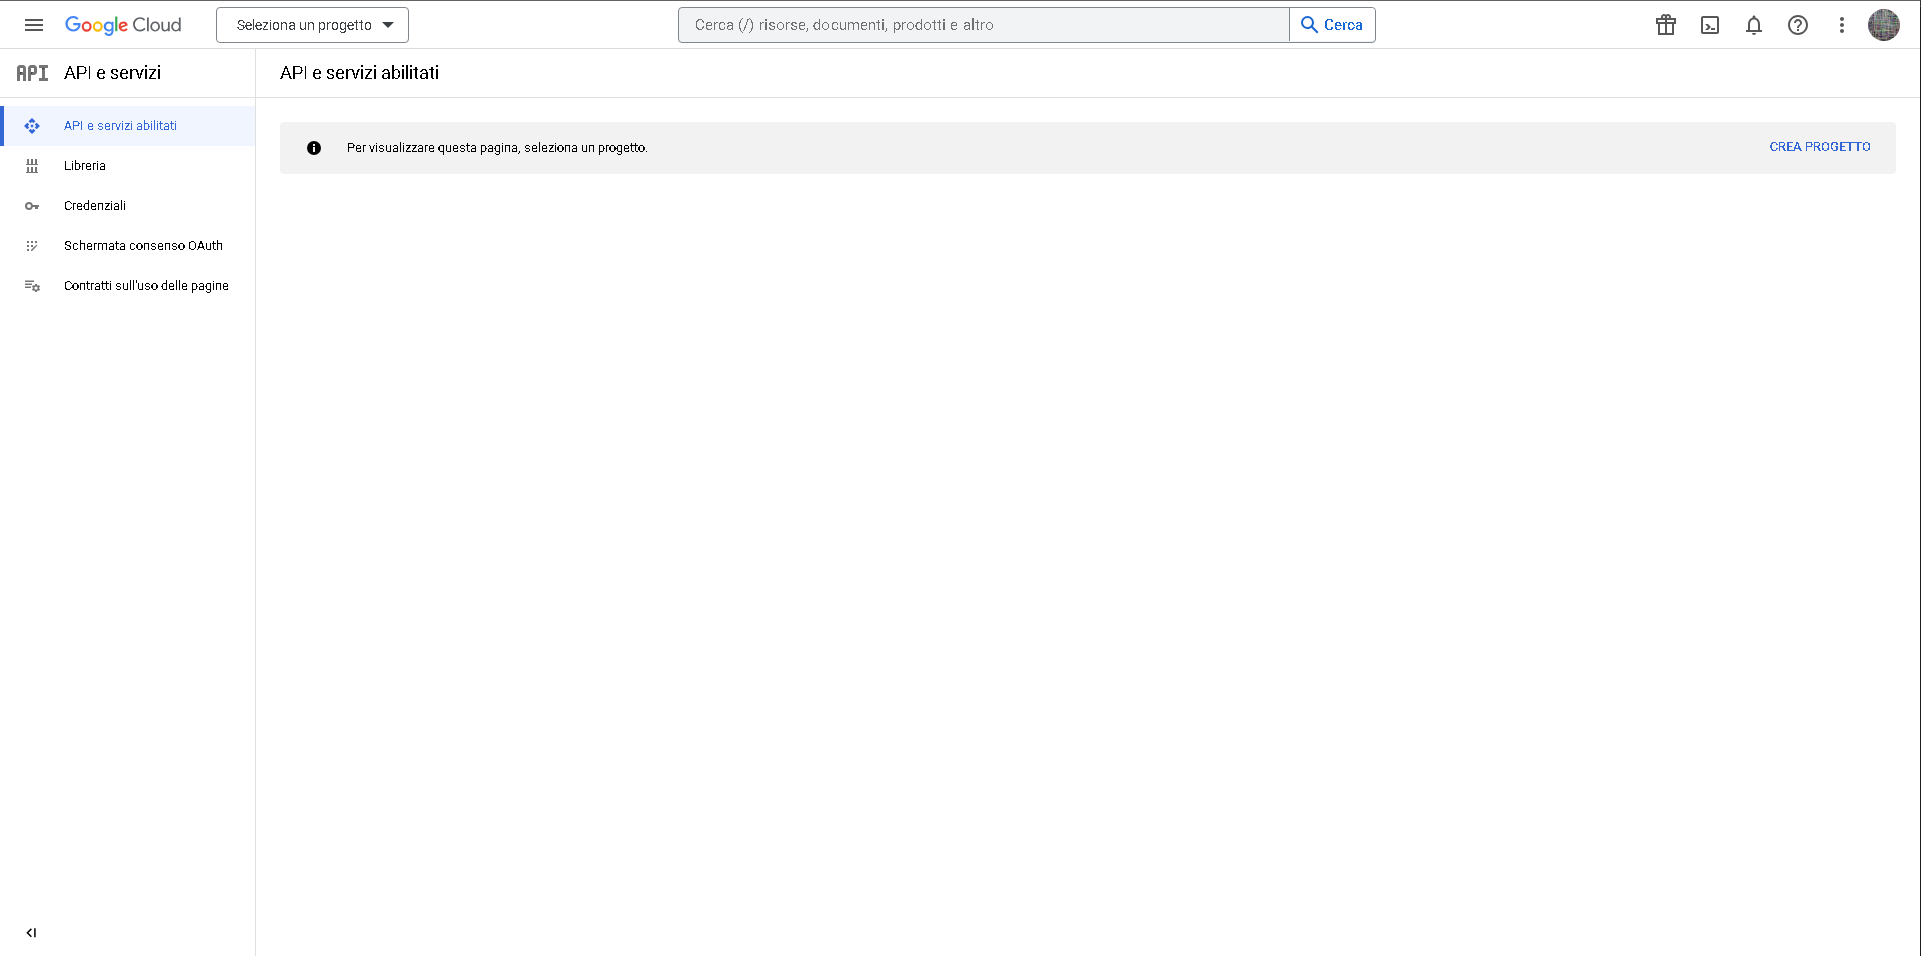

Adesso clicchiamo su "Seleziona un progetto", "Nuovo progetto" e gli diamo un nome. Fatto ciò avremo la seguente schermata.

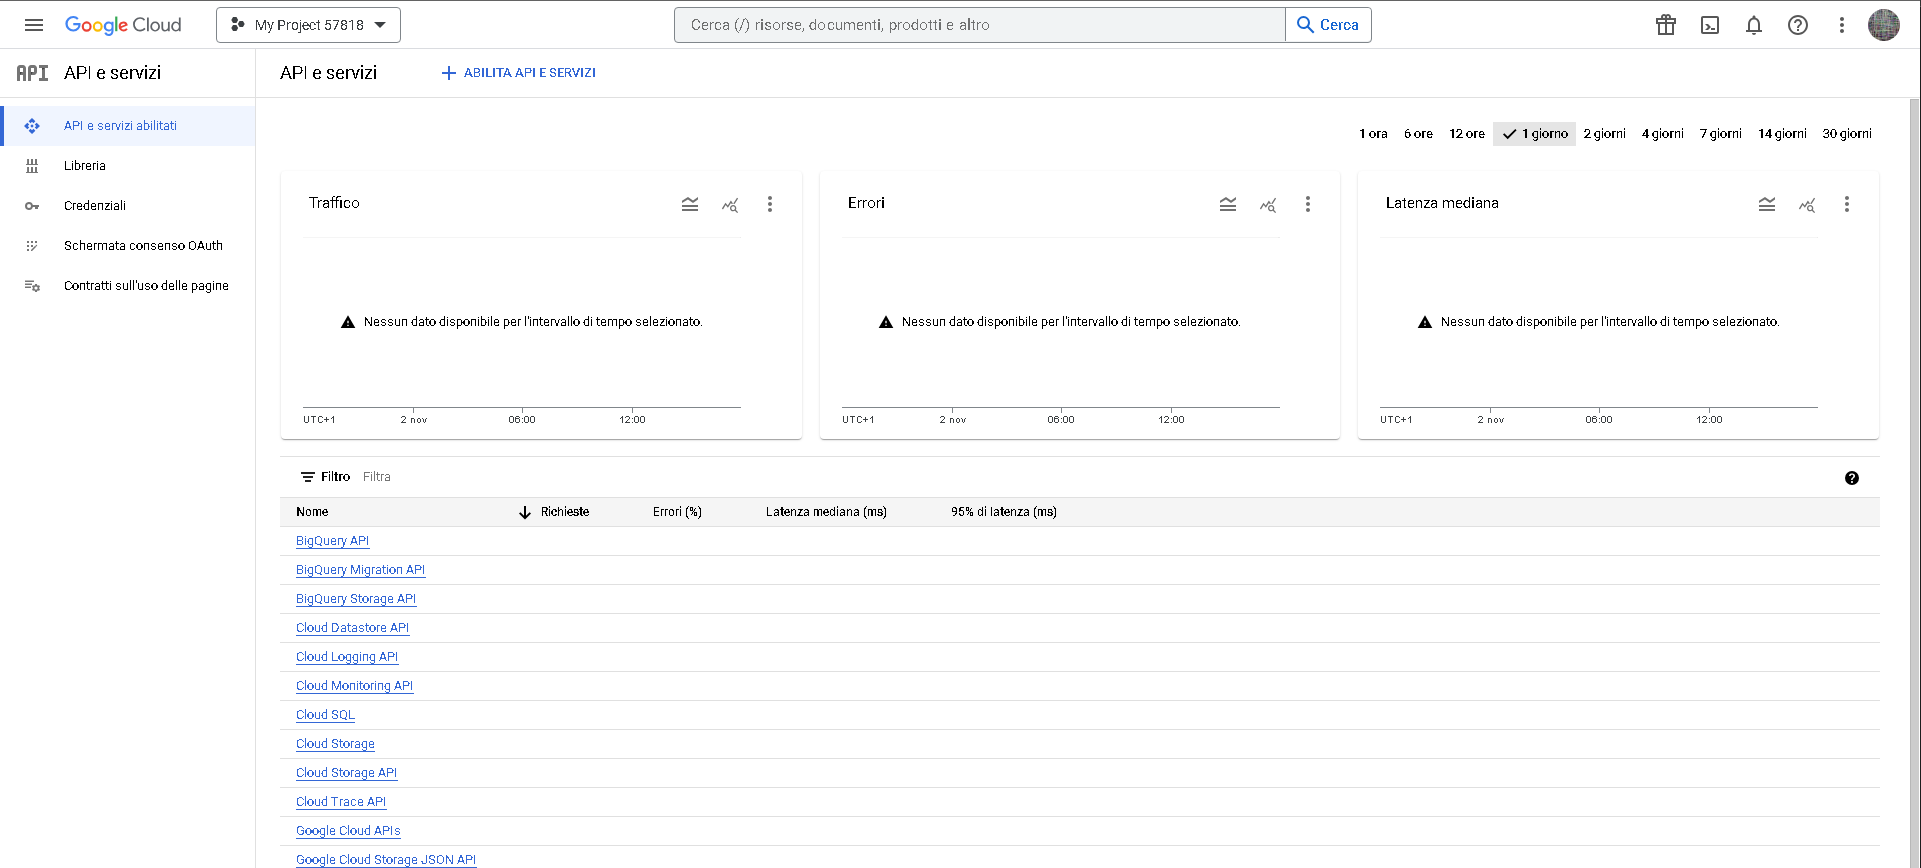

Dopo aver creato il progetto, assicuriamoci che l'API di dati di YouTube sia uno dei servizi per cui è registrata la nostra applicazione per l'utilizzo. Per verificarlo è necessario cliccare su “Libreria” presente nella parte sinistra della schermata. Nella nuova pagina che si aprirà dovremo digitare il nome dell’API nella barra di ricerca.

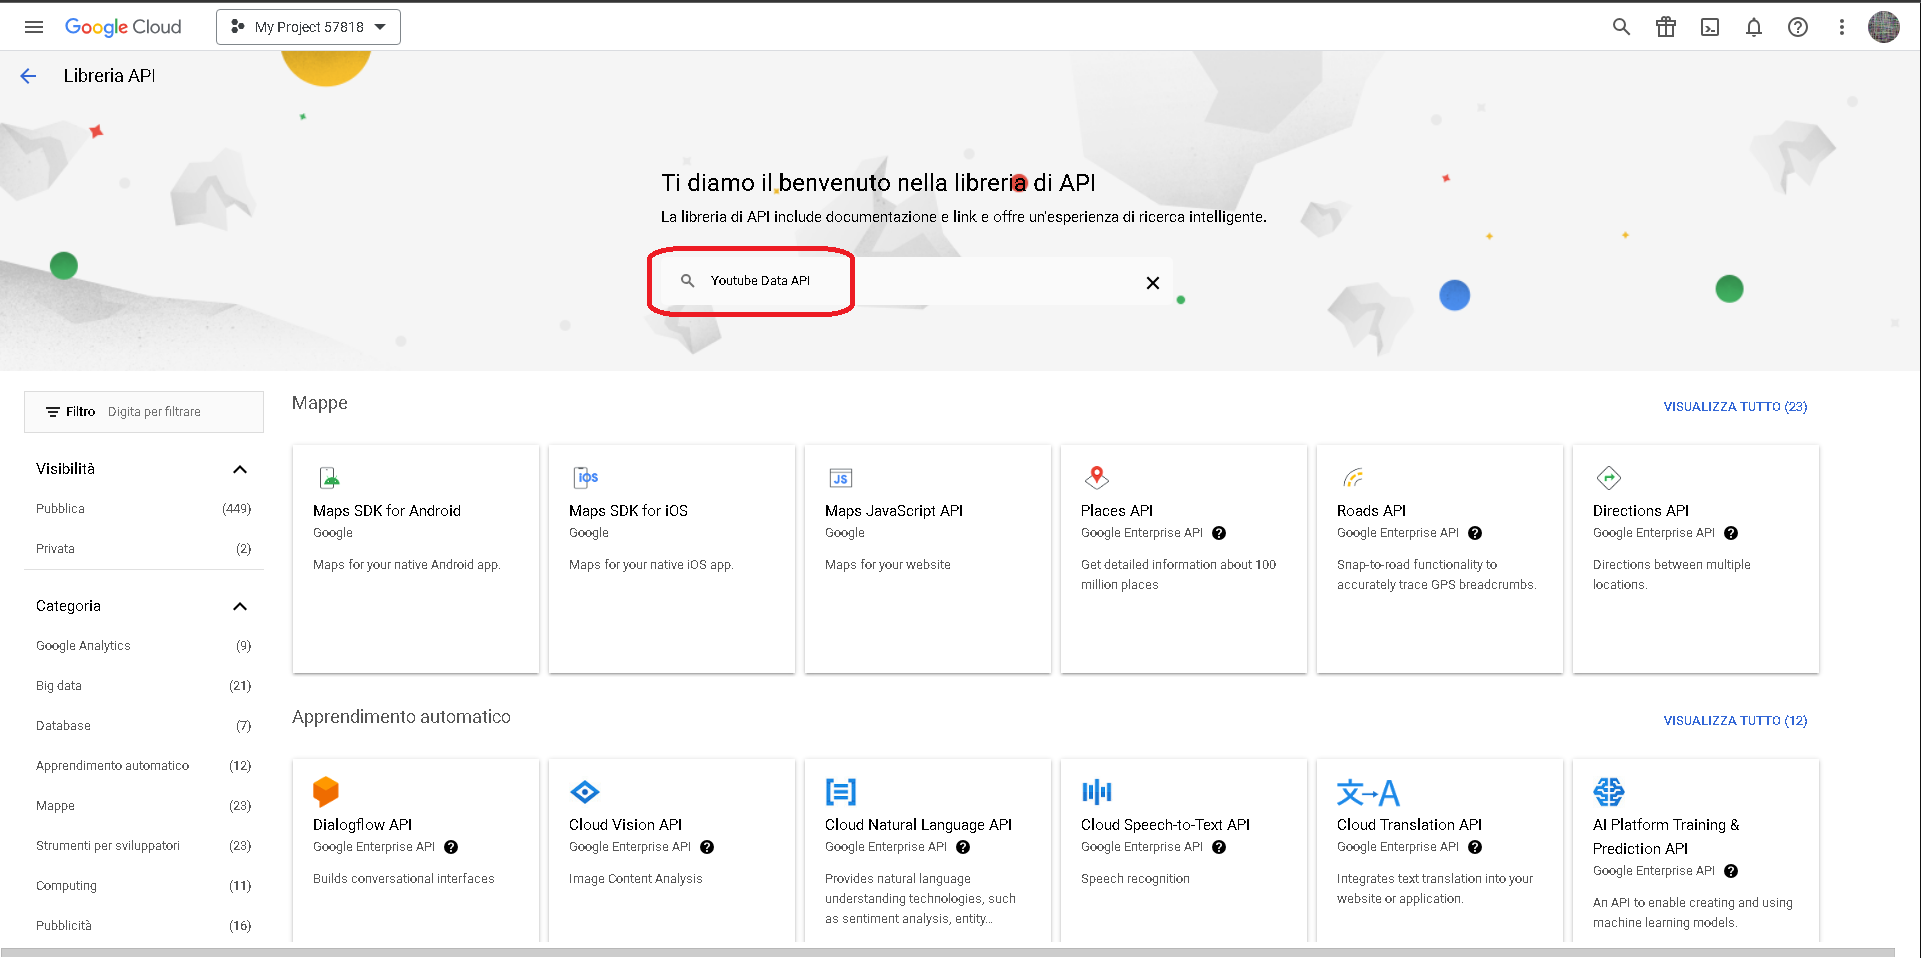

Nella schermata successiva clicchiamo su “Youtube Data API v3” e nella schermata successiva su “Abilita”. 

### Utilizzo OAuth

Fatto ciò dobbiamo, prima di iniziare a raccogliere dati, implementare l'autorizzazione OAuth 2.0. Google Cloud Console offre due tipi di credenziali: Chiavi API e ID client OAuth 2.0. Le chiavi API sono utilizzate per accedere a risorse pubbliche e non richiedono autenticazione utente, mentre gli ID client OAuth sono utilizzati quando è necessario accedere alle risorse degli utenti e ottenere l'autorizzazione specifica da parte dell'utente. Per sapere come implementare l'autorizzazione OAuth 2.0 per accedere all'API di dati di YouTube è presenta una [guida](https://developers.google.com/youtube/v3/guides/auth/client-side-web-apps?hl=it). Mostriamo brevemente i passaggi da effettuare

Il primo passaggio è quello di creare le credenziali di autorizzazione nella Google Cloud Console. Qualsiasi applicazione che utilizza OAuth 2.0 per accedere alle API di Google deve avere credenziali di autorizzazione che identificano l'applicazione sul server OAuth 2.0 di Google.

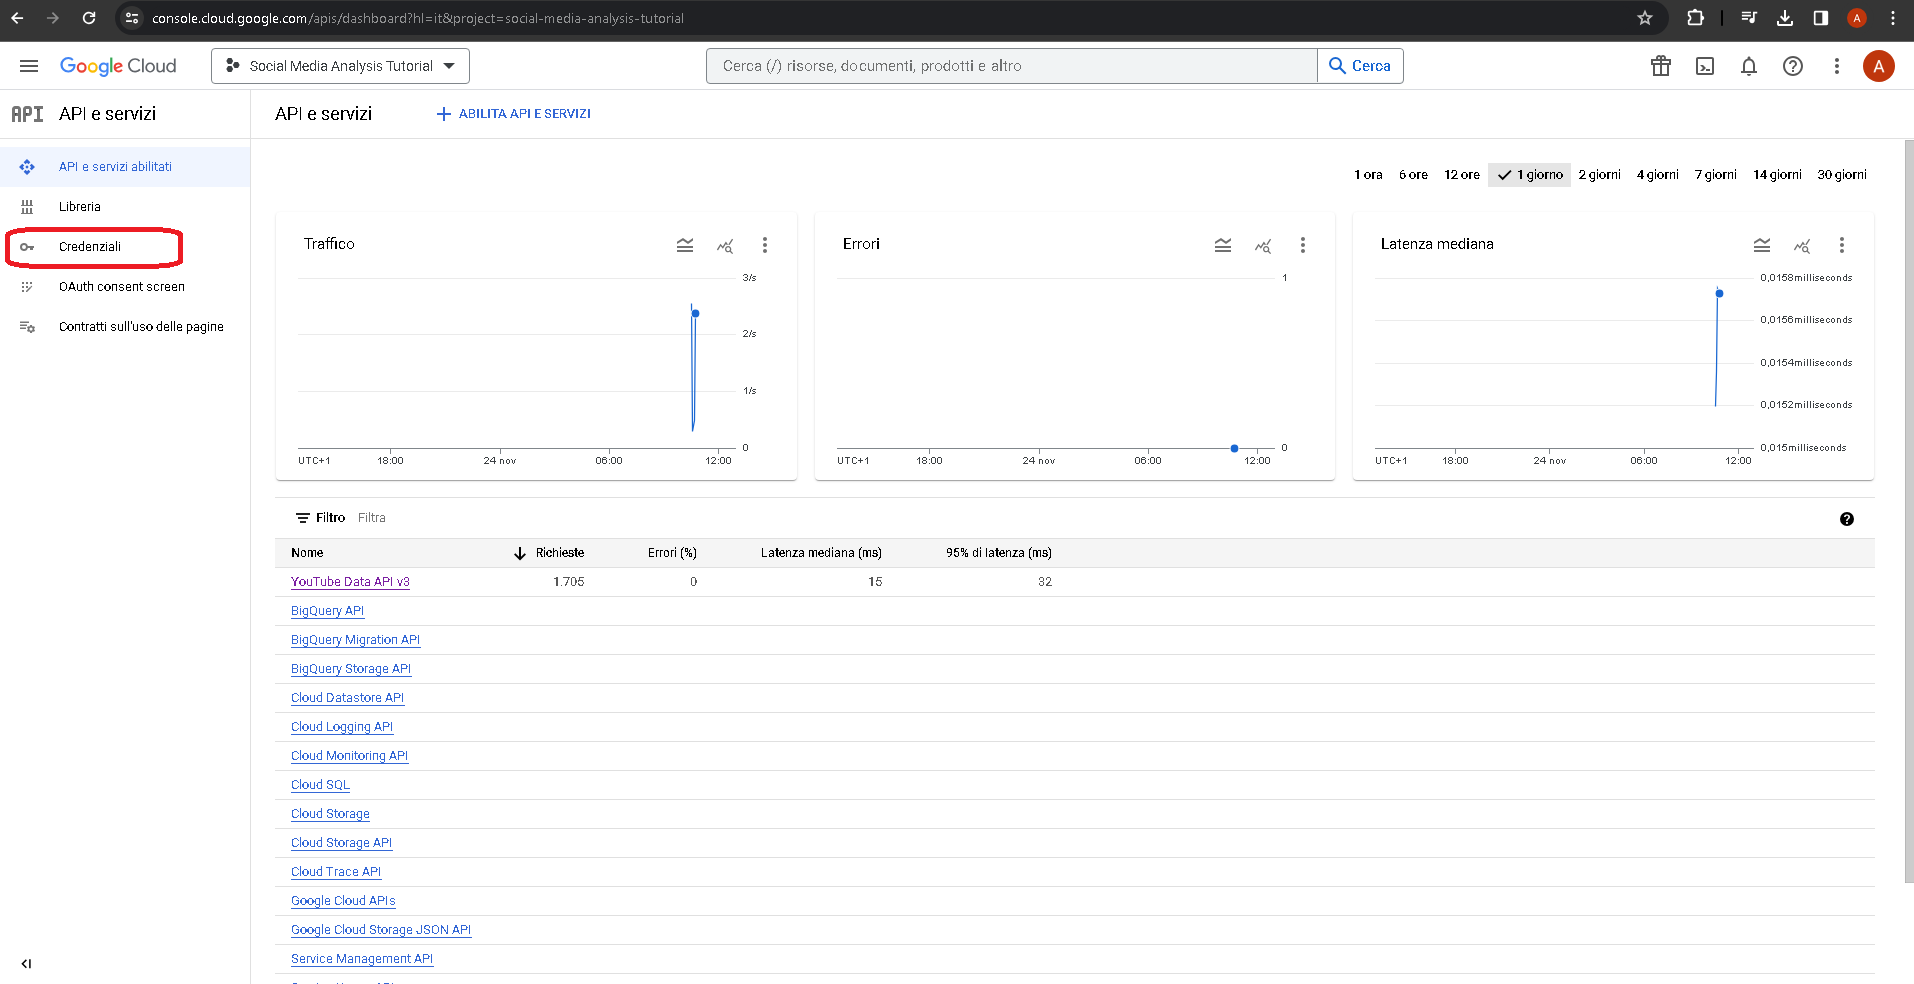

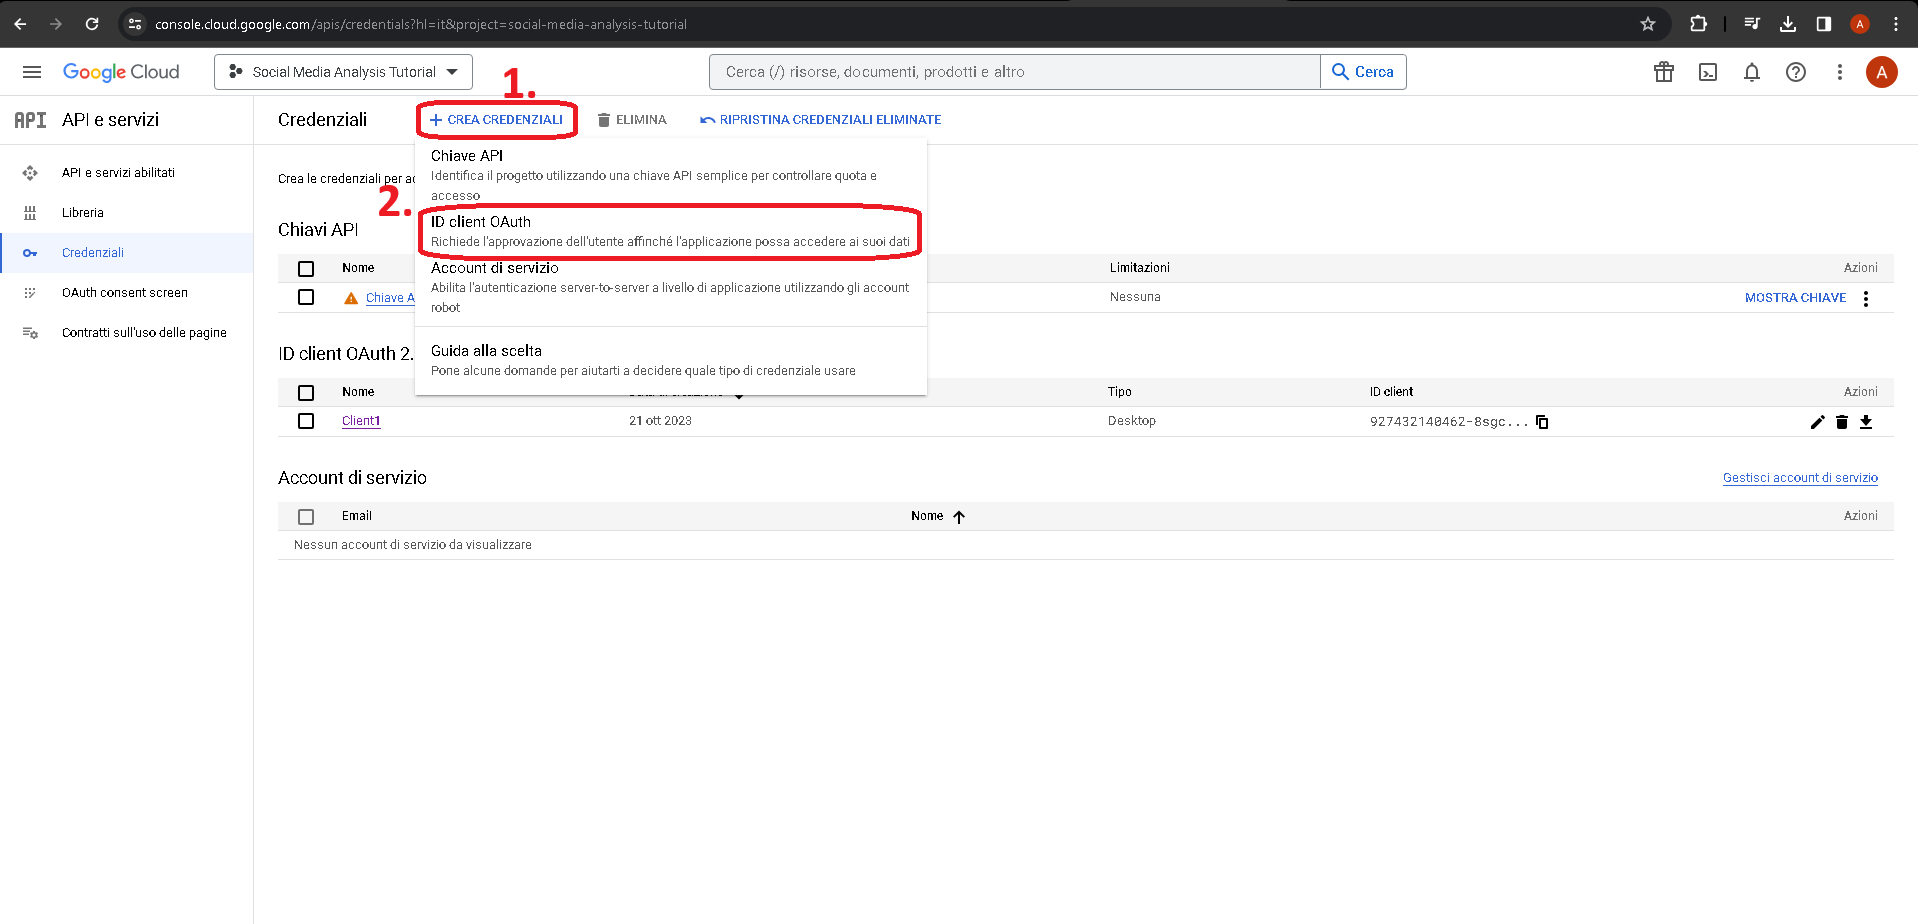

Fatto ciò ci si aprirà un altra scheda in cui dovremmo decidere il "Tipo di applicazione", nel nostro caso scegliamo "Applicazione Web", tuttavia esistono altre soluzioni(spiegate meglio [qui](https://developers.google.com/youtube/v3/guides/authentication?hl=it)). Nel caso stessimo usando Javascript per lavorare con l'API è necessario specificare le origini JavaScript autorizzate.

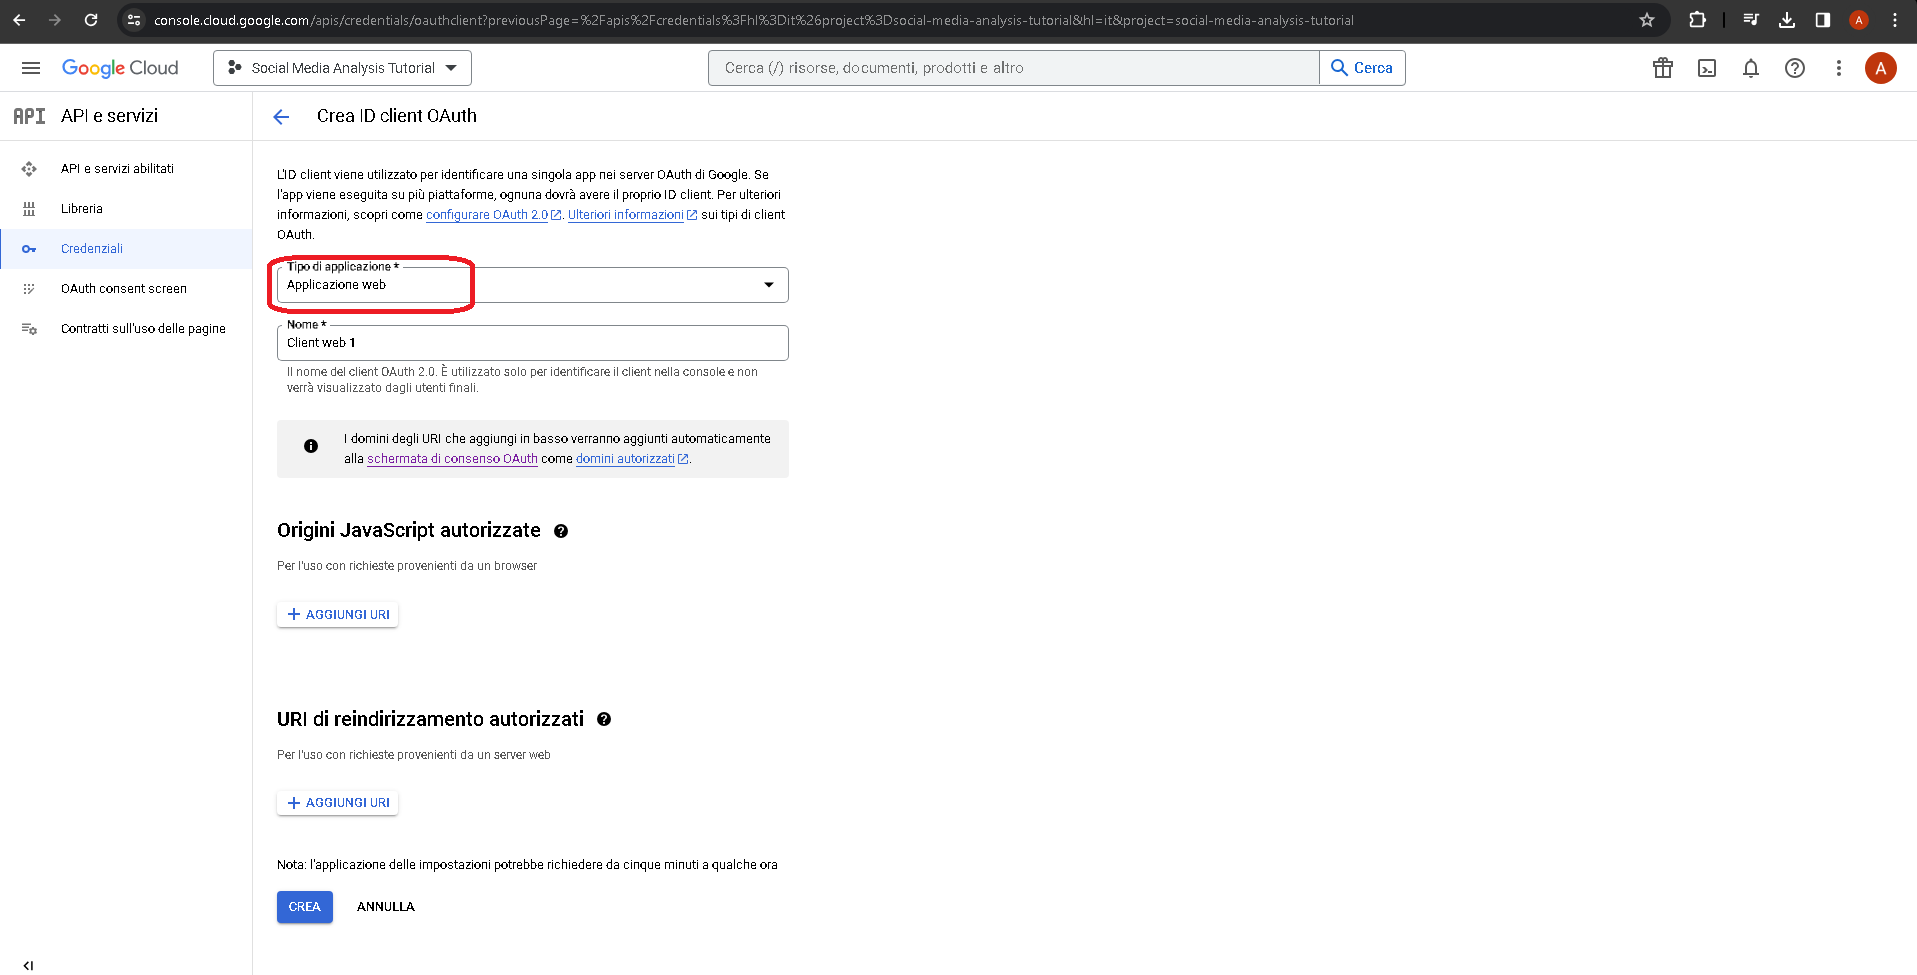

Una volta che abbiamo impostato tutto, clicchiamo su "Crea" e si aprirà una finestra che ci permetterà di scaricare un file json da cui prendere le credenziali.

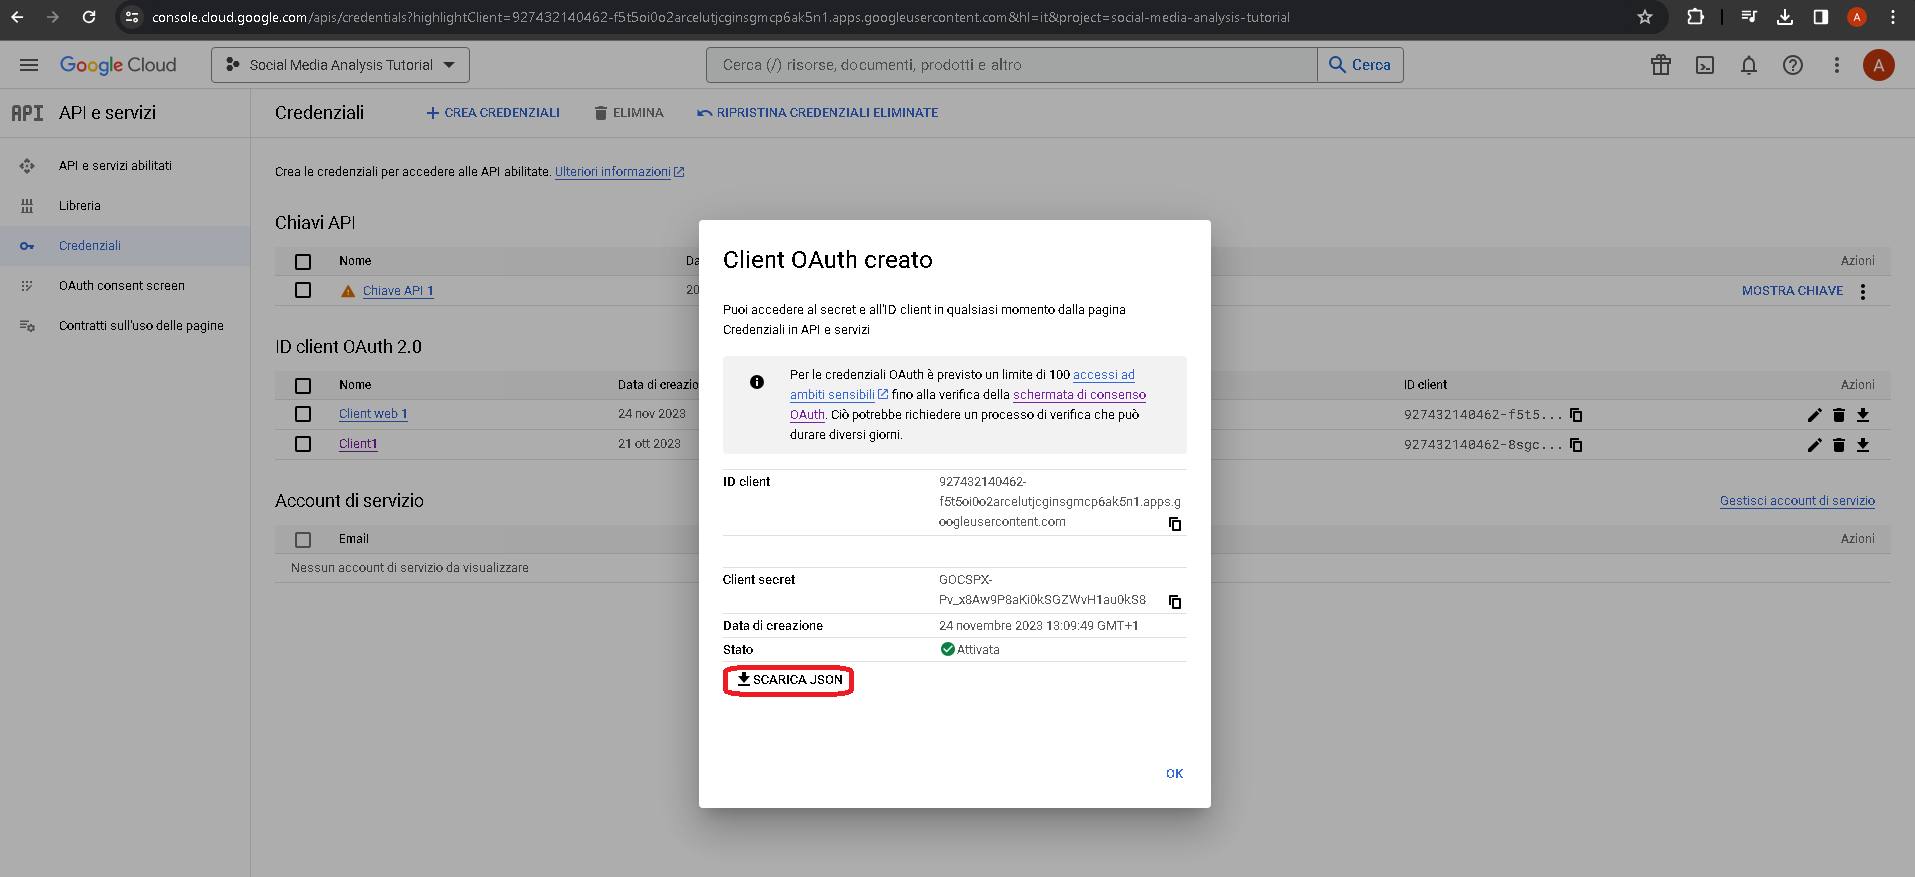

Adesso possiamo iniziare a scrivere codice. Importiamo le principali librerie che ci serviranno per il progetto.

In [1]:
from apiclient.discovery import build

La libreria "apiclient.discovery" è parte della libreria client di Google API per Python e fornisce un modo per creare oggetti API, tramite il metodo build(), per interagire con le API di Google.

In [2]:
from google_auth_oauthlib.flow import InstalledAppFlow

La libreria "google_auth_oauthlib.flow" fornisce strumenti per gestire il flusso di autorizzazione OAuth 2.0, in particolare è comunemente utilizzata per autenticare un'applicazione e ottenere l'accesso a risorse protette attraverso le API di Google.

In [3]:
import pandas as pd
from matplotlib import pyplot as plt

Pandas e Matplotlib ci serviranno in seguito per lavorare con i dati che raccogliamo da Youtube.

In [4]:
scopes = ["https://www.googleapis.com/auth/youtube.readonly"]

La variabile "scopes" indentifica gli ambiti di accesso. Gli ambiti consentono all' applicazione di richiedere l'accesso solo alle risorse di cui abbiamo bisogno, permettendo al contempo agli utenti di controllare i dati personali ai quali potrebbe accedere l'applicazione. Esistono altri ambiti oltre a quello che abbiamo scelto, per visualizzarli tutti Google ha messo a disposizione un [link](https://developers.google.com/identity/protocols/oauth2/scopes?hl=it#youtube) in cui sono presenti non sono quelli relativi alla nostra API ma a tutte le API di Google.

In [5]:
client_secrets_file = "client_secret.json"
flow = InstalledAppFlow.from_client_secrets_file(client_secrets_file, scopes)
credentials = flow.run_local_server()
youtube=build('youtube','v3',credentials=credentials)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=927432140462-8sgcjd8utdgi6r7tvp23p11bk7gmmjjs.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fyoutube.readonly&state=pNko5jfiqrUOGjC0G9mX6ibK5viPys&access_type=offline


Grazie al codice scritto sopra possiamo eseguire l'autenticazione con l'API di Youtube utilizzando l'autorizzazione OAuth. La variabile "youtube" rappresenta l'oggetto che ci permette di interagire con l'API. Tuttavia sarà necessario seguire alcuni passaggi. Eseguendo il codice si aprirà automaticamento una schermata che ci permetterà di accedere tramite il nostro account Google.

Adesso abbiamo finito la fase di autenticazione e possiamo lavorare con l'API e Python.

In [6]:
import re
def format_duration(input_string):

    # Utilizza espressioni regolari per estrarre i numeri prima di "H", prima di "M" e prima di "S"
    h_match = re.search(r'(\d+)H', input_string)
    m_match = re.search(r'(\d+)M', input_string)
    s_match = re.search(r'(\d+)S', input_string)

    hours = int(h_match.group(1)) if h_match else 0
    minutes = int(m_match.group(1)) if m_match else 0
    seconds = int(s_match.group(1)) if s_match else 0

    # Formatta l'intervallo di tempo in secondi
    formatted_duration= (hours * 3600) + (minutes * 60) + seconds

    return formatted_duration

Questa prima funzione risulta importante per punti successivi nel tutorial, ma la scriviamo ora in modo tale da poter lavorare direttamente senza aver la necessità di modficiare i nostri dati in un secondo momento. 

# Ricerca video più visti per anno

In [7]:
def get_most_viewed_videos(year, total_video):
    # Crea una lista vuota per i dati
    data = []
    videos_collected = 0
    next_page_token = None
    maxResults = 50
    
    while videos_collected < total_video:
        # Esegui la query per ottenere i video più visti nell'anno specificato
        search_response = youtube.search().list(
            part="snippet",
            q="",
            type="video",
            #eventType="completed",
            order="viewCount",
            publishedAfter=f"{year}-01-01T00:00:00Z",
            publishedBefore=f"{year}-10-31T00:00:00Z",
            maxResults=min(maxResults, total_video - videos_collected),  # Numero di video da ottenere
            pageToken=next_page_token
        ).execute()

        # Estrai e inserisci i dati nella lista "data"
        for search_result in search_response.get("items", []):
            video_id = search_result["id"]["videoId"]
            video_info = youtube.videos().list(part="snippet,statistics,contentDetails", id=video_id).execute()
            snippet = video_info["items"][0]["snippet"]
            statistics = video_info["items"][0]["statistics"]
            contentDetails = video_info["items"][0]["contentDetails"]

            duration = format_duration(contentDetails.get("duration"))

            if duration > 0:
                data.append({
                    "Titolo": snippet["title"],
                    "Canale": snippet["channelTitle"],
                    "Visualizzazioni": int(statistics.get("viewCount", 0)),
                    "Like": int(statistics.get("likeCount", 0)),
                    "NumCommenti": int(statistics.get("commentCount", 0)),
                    "IDCategoria": snippet.get("categoryId", ""),
                    "Durata" : duration
                })
                videos_collected += 1
            
            if videos_collected >= total_video:
                break
                
            next_page_token = search_response.get("nextPageToken")
            
            if not next_page_token:
                break


    return data

Questo metodo uno dei metodi principali dell'API di Youtube, ovvero search().list(). Questa funziona restituisce una raccolta di risultati di ricerca che corrispondono ai parametri di ricerca specificati nella richiesta API. Per impostazione predefinita, un set di risultati di ricerca identifica le risorse video, channel e playlist corrispondenti, ma puoi anche configurare query per recuperare solo un tipo specifico di risorsa(in questo caso video). Oltre a questo è possibile definire anche un ordinamento dei video e il periodo in cui questi video sono stati pubblicati. Dentro il for presente nella funzione sfruttiamo invece videos().list() per raccogliere informazioni sui video. Nella parte finale usiamo la variabile next_page_token nel caso in cui il numero di video richiesti ("total_video") non sia stato raggiunto nella prima ricerca.

In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Queste due funzioni di pandas servono solo per consentire una visione dei 100 record del dataframe. Fatto questo richiamiamo la funzione e stampiamo i dataframe. Per avere una analisi con un numero sufficente di risultati prendiamo i 100 video piu visti negli anni 2008,2010,2012,2014,2016,2018,2020,2022.

In [9]:
df_2008=pd.DataFrame(get_most_viewed_videos("2008",100))

In [10]:
df_2008

,Titolo,Canale,Visualizzazioni,Like,NumCommenti,IDCategoria,Durata
0,Queen – Bohemian Rhapsody (Official Video Rema...,Queen Official,1710202216,12145235,630656,10,360
1,Pintinho Amarelinho - Galinha Pintadinha 1 - O...,Galinha Pintadinha,1212867350,2627277,0,1,114
2,Katy Perry - Hot N Cold (Official Music Video),KatyPerryVEVO,1192516057,5761791,198536,10,284
3,"Sesame Street: Feist sings 1,2,3,4",Sesame Street,961409185,2271731,0,24,141
4,A Baratinha - Galinha Pintadinha 1 - OFICIAL,Galinha Pintadinha,882550508,1576122,0,1,198
5,Coldplay - Viva La Vida (Official Video),Coldplay,871204425,4983533,276352,10,243
6,Queen - Don't Stop Me Now (Official Video),Queen Official,864257522,5516818,230313,10,213
7,Carlos Baute - Colgando en tus manos (con Mart...,Carlos Baute,779474167,2812944,72807,10,235
8,Jason Mraz - I'm Yours (Official Video) [4K Re...,Jason Mraz,767498143,4376735,131444,10,222
9,"Luis Miguel - ""Ahora te puedes marchar"" (Video...",Warner Music México,672243233,2678070,64448,10,191


In [11]:
df_2010=pd.DataFrame(get_most_viewed_videos("2010",100))

In [12]:
df_2010

,Titolo,Canale,Visualizzazioni,Like,NumCommenti,IDCategoria,Durata
0,Shakira - Waka Waka (This Time for Africa) (Th...,shakiraVEVO,3790515010,21915525,1313562,10,211
1,Justin Bieber - Baby ft. Ludacris,JustinBieberVEVO,3056153420,24486109,4819739,10,220
2,Eminem - Love The Way You Lie ft. Rihanna,EminemVEVO,2707779483,13438647,605311,10,267
3,Bruno Mars - Just The Way You Are (Official Mu...,Bruno Mars,1896065716,8149506,245744,10,237
4,a-ha - Take On Me (Official Video) [Remastered...,a-ha,1824441969,10585904,325822,10,244
5,Eminem - Not Afraid,EminemVEVO,1818966042,11949534,881840,10,259
6,Katy Perry - Firework (Official Music Video),KatyPerryVEVO,1447416591,6492057,448388,10,234
7,Aqua - Barbie Girl (Official Music Video),AquaVEVO,1384945133,8390994,414869,10,202
8,The Police - Every Breath You Take (Official M...,ThePoliceVEVO,1201055976,5210207,114485,10,229
9,Waka Waka (Esto es Africa) (Cancion Oficial de...,shakiraVEVO,920374702,5688760,254981,10,213


In [13]:
df_2012=pd.DataFrame(get_most_viewed_videos("2012",100))

In [14]:
df_2012

,Titolo,Canale,Visualizzazioni,Like,NumCommenti,IDCategoria,Durata
0,Piccolo Coro dell'Antoniano - Volevo un gatto ...,pcantonianoVEVO,294766435,542978,0,10,154
1,Piccolo Coro dell'Antoniano - Il coccodrillo c...,pcantonianoVEVO,161683250,352531,0,10,126
2,Spartacus Ep9 #1 - Scena sesso Lucrezia con Ba...,Cielotv,135178889,105431,2118,24,120
3,Piccolo Coro dell'Antoniano - Il caffè della P...,pcantonianoVEVO,126380810,247767,0,10,121
4,Piccolo Coro dell'Antoniano - Non lo faccio pi...,pcantonianoVEVO,99392628,243312,0,10,135
5,Piccolo Coro dell'Antoniano - Torero Camomillo...,pcantonianoVEVO,90184604,216287,0,10,141
6,Piccolo Coro dell'Antoniano - Il gatto puzzolo...,pcantonianoVEVO,75383706,167819,0,10,158
7,Eros Ramazzotti - Un Angelo Disteso Al Sole,ErosRamazzottiVEVO,72753605,232053,7356,10,247
8,Arisa - La notte (Official Video),Warner Music Italy,67169674,231893,9064,10,240
9,Modà feat. Jarabedepalo - Come un pittore - Vi...,rockmoda,62011118,270052,9319,10,250


In [15]:
df_2014=pd.DataFrame(get_most_viewed_videos("2014",100))

In [16]:
df_2014

,Titolo,Canale,Visualizzazioni,Like,NumCommenti,IDCategoria,Durata
0,Frozen: Il Regno di Ghiaccio -- All'Alba sorge...,Disney IT,101280349,298049,0,1,230
1,Viva La Pappa Col Pomodoro - Canzone Per Bambini,AZZURRAMUSICable,88917146,195905,0,10,176
2,Francesco Renga - Il mio giorno più bello nel ...,FrancescoRengaVEVO,69562171,230119,4437,10,222
3,Emis Killa - Maracanã,EmisKillaOnVEVO,49314384,463988,17005,10,237
4,Novak Djokovic: Hilarious Moments II,Tennis Now,30392903,134470,3333,17,518
5,La casa di Topolino -- E' proprio divertente e...,DisneyJuniorIT,29012473,51049,0,1,239
6,Alessandra Amoroso - Non devi perdermi (Video ...,AlessandramorosoVEVO,28899411,115407,2134,10,208
7,Frozen -- Do you want to build a snowman? (Art...,DisneyChannelIT,27224366,410807,0,24,137
8,Spandau Ballet - Through the Barricades,spandauVEVO,27075776,117581,6160,10,321
9,Rocco Hunt - Vieni con me (Videoclip),RoccoHuntVEVO,25415194,122729,3367,10,233


In [17]:
df_2016=pd.DataFrame(get_most_viewed_videos("2016",100))

In [18]:
df_2016

,Titolo,Canale,Visualizzazioni,Like,NumCommenti,IDCategoria,Durata
0,abcd song for kindergarten | abc songs for chi...,ABC Song For Children,157035309,0,0,24,115
1,Marracash - Niente Canzoni D'Amore ft. Federic...,MarracashVEVO,69651840,301914,5225,10,234
2,Marco Mengoni - Sai che (Videoclip),MarcoMengoniVEVO,67902409,209801,5488,10,275
3,Alessandra Amoroso - Sul ciglio senza far rumo...,AlessandramorosoVEVO,58346194,190842,4936,10,226
4,Alessandra Amoroso - Vivere a colori (Video Uf...,AlessandramorosoVEVO,55406972,208514,6752,10,275
5,CAPO PLAZA - Nisida (Prod. AVA),Capo Plaza,43187196,241524,5734,10,245
6,Max Gazzé - Ti Sembra Normale,MaxGazzeVEVO,30718134,107603,2374,10,227
7,Giorgia - Oronero (Videoclip),GiorgiaVEVO,23414400,135670,3974,10,213
8,Marco Mengoni - Parole in circolo (Videoclip),MarcoMengoniVEVO,22888669,97636,1775,10,266
9,Briga - Baciami,HoniroLabelVEVO,22803982,123055,3204,10,210


In [19]:
df_2018=pd.DataFrame(get_most_viewed_videos("2018",100))

In [20]:
df_2018

,Titolo,Canale,Visualizzazioni,Like,NumCommenti,IDCategoria,Durata
0,Джони Джони | Johny Johny Yes Papa | Kids Song...,Беби Смарт Мультфильмы,222737873,770331,0,1,148
1,Måneskin - Torna a casa,ManeskinVEVO,172489471,1361137,37142,10,230
2,A Ram Sam Sam - Canzoni da ballare per bambini,HeyKids - Canzoni Per Bimbi,127515011,304338,0,27,2400
3,Måneskin - Morirò da Re,ManeskinVEVO,85501694,788079,16761,10,186
4,Scott Pilgrim Vs. The World - Black Sheep [HD],clarencito,76577879,869932,21474,1,223
5,Alessandra Amoroso - La stessa (Video Ufficiale),AlessandramorosoVEVO,59390708,195221,5170,10,226
6,Takagi & Ketra - Da sola / In the night ft. To...,TakagiKetraVEVO,53146634,156701,4435,10,220
7,I Thunderman | Caramella di Halloween 🍬 | Nick...,Nickelodeon Italia,52426500,170546,0,24,197
8,"Elodie, Michele Bravi, Guè - Nero Bali",ElodieVEVO,46378769,218989,4939,10,188
9,Emma - Mi Parli Piano,emmaVEVO,44474713,149380,5807,10,218


In [21]:
df_2020=pd.DataFrame(get_most_viewed_videos("2020",100))

In [22]:
df_2020

,Titolo,Canale,Visualizzazioni,Like,NumCommenti,IDCategoria,Durata
0,Francesco Gabbani - Viceversa (Official Music ...,Francesco Gabbani,81149230,341597,13808,10,216
1,Carolina e Topo Tip: medley con 20 minuti di c...,CarolinaBenvengaVEVO,77765485,119800,0,10,1235
2,Oldies But Goodies Non Stop Medley - Greatest ...,Music Home Channel,59584490,224432,7782,10,6291
3,Marracash - CRUDELIA - I nervi,MarracashVEVO,54093803,281562,5904,10,232
4,NON COMPRERAI PIÙ IL PANE! SENZA FORNO! Incred...,Il Rifugio Perfetto,46181091,483098,14045,26,311
5,Luli Pampín Ft. La Brigata Canterina - GIOCHIA...,Alman Kids,43484020,50264,0,10,195
6,Carolina Benvenga - Carolina e Topo Tip - Bumb...,CarolinaBenvengaVEVO,40852842,61419,0,10,162
7,thasup - blun7 a swishland (Official Video),thaSupremeVEVO,40713670,580859,27693,10,179
8,S5 E03 مسلسل منصور | الحذاء الجامح | Mansour C...,مغامرات منصور,25809333,228396,0,1,668
9,"La torta si SCIOGLIE IN BOCCA, Facilissima ed ...",Il Rifugio Perfetto,25280138,341493,6866,26,337


In [23]:
df_2022=pd.DataFrame(get_most_viewed_videos("2022",100))

In [24]:
df_2022

,Titolo,Canale,Visualizzazioni,Like,NumCommenti,IDCategoria,Durata
0,Mercuri_88 Shorts - Baloon lover,mercuri_88,466533929,10702579,22691,23,16
1,MOZZARELLA CROQUETTE XL #shorts #asmr,Giallozafferano Italian Recipes,280941756,6895075,7833,26,23
2,Western Australia – A place to work like no other,Western Australia - Like No Other,230676273,5013,0,22,16
3,SUPER TRAINING WITH WINCHESTER NOBEL SPORT ...,Raniero Testa,215651899,4839002,35597,17,7
4,20 maggio 2022,Ornella Zocco,125784456,2468245,33389,22,13
5,Baby Gang – Mentalité [Official Video],Baby Gang,77236920,717060,6658,10,235
6,Lucilla - TUTTI GLI ANIMALI (Cantan con me) 🐶 ...,Lucilla,68062207,112211,0,10,198
7,Work Hard. Stay Humble. Wear Dixxon.,Dixxon Flannel Co.,54707723,116,3,24,31
8,Lucilla - SE SEI FELICE E TU LO SAI batti le m...,Lucilla,46896911,61441,0,10,226
9,Tatuaggi strani🤣 #shorts,Max Horror,39574904,696442,1329,22,12


# Categorie più viste

Completato il punto precedente vogliamo vedere adesso in quali categorie rientrano i 100 video più visti.

In [25]:
def categories_dictionary():
    dictionary={}
    
    request = youtube.videoCategories().list(
        part="snippet",
        hl="it",
        regionCode="IT"
    )
    response = request.execute()
    
    for result in response.get("items", []):
        result_id = result["id"]
        result_name = result["snippet"]["title"]
        dictionary[result_id] = result_name
    
    return dictionary

In [26]:
categories = categories_dictionary()

Il metodo "category_dictionary" è necessario per ottenere tutte le categorie presenti su Google e per farlo si usa un metodo dell'API (videoCategories().list) che effetua una ricerca basata su lingua e regione.

In [27]:
def category_count(df):
    dict_count={}
    
    for ID in df.IDCategoria:
        if ID not in dict_count:
            dict_count[ID] = 1
        else:
            dict_count[ID] += 1
    
    return dict_count

Il metodo "category_count" si occupa di contare quanti video di una determinata categoria sono presenti nella top 100.

In [28]:
category_count_2008=category_count(df_2008)

In [29]:
category_count_2010=category_count(df_2010)

In [30]:
category_count_2012=category_count(df_2012)

In [31]:
category_count_2014=category_count(df_2014)

In [32]:
category_count_2016=category_count(df_2016)

In [33]:
category_count_2018=category_count(df_2018)

In [34]:
category_count_2020=category_count(df_2020)

In [35]:
category_count_2022=category_count(df_2022)

In [36]:
def plot_categories_count(category_count, categories):
    
    # Crea il dizionario
    final_dict = {}
    
    # Inizializza final_dict con valori iniziali a zero per ciascuna categoria
    for category in categories:
        final_dict[category] = 0
    
    # Per ogni chiave nel dizionario category_count inserisci la value
    for key, value in category_count.items():
        final_dict[key] = value
    
    plt.figure().set_figwidth(10) 
    plt.bar(list(final_dict), final_dict.values())
    plt.xticks(range(len(categories)), list(categories.values()),rotation=90)
    plt.show()

I risultati dei due metodi scritti precedentemente vengono usati come argomenti in input del metodo "plot_categories_count" che si occupa di riportare in un grafico quanti video sono presenti per ogni categoria.

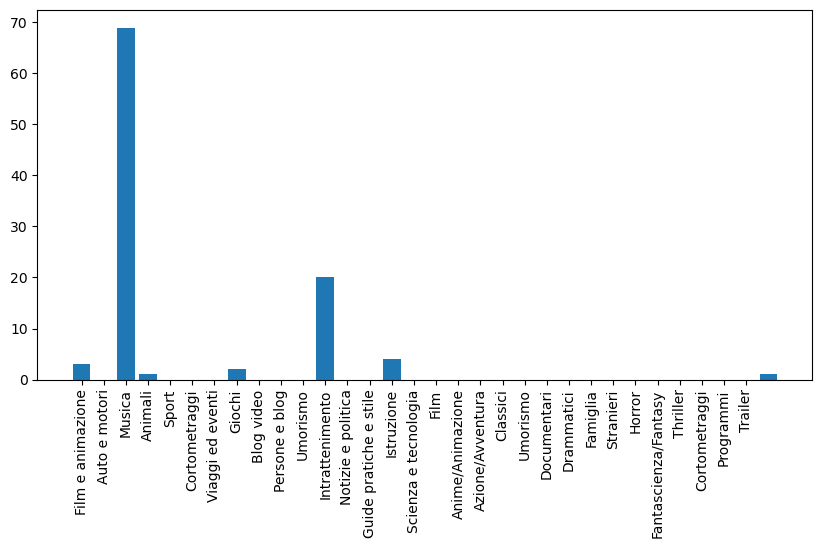

In [37]:
plot_categories_count(category_count_2008, categories)

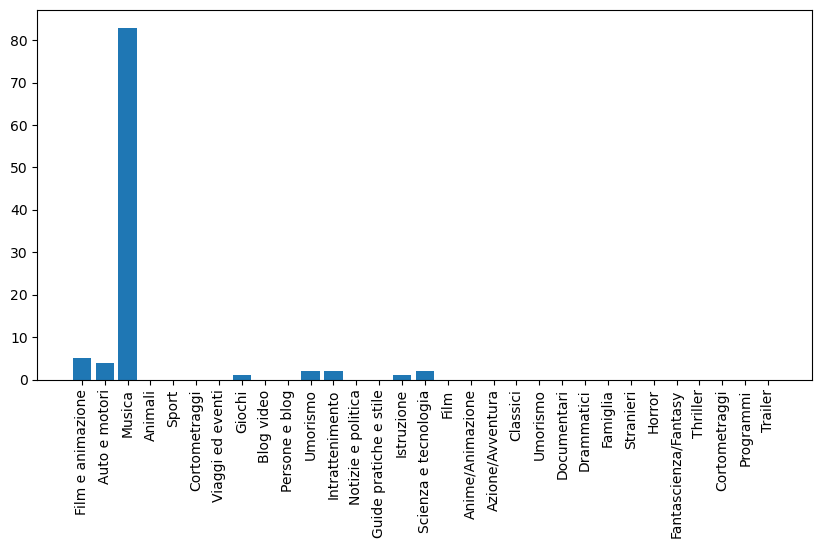

In [38]:
plot_categories_count(category_count_2010, categories)

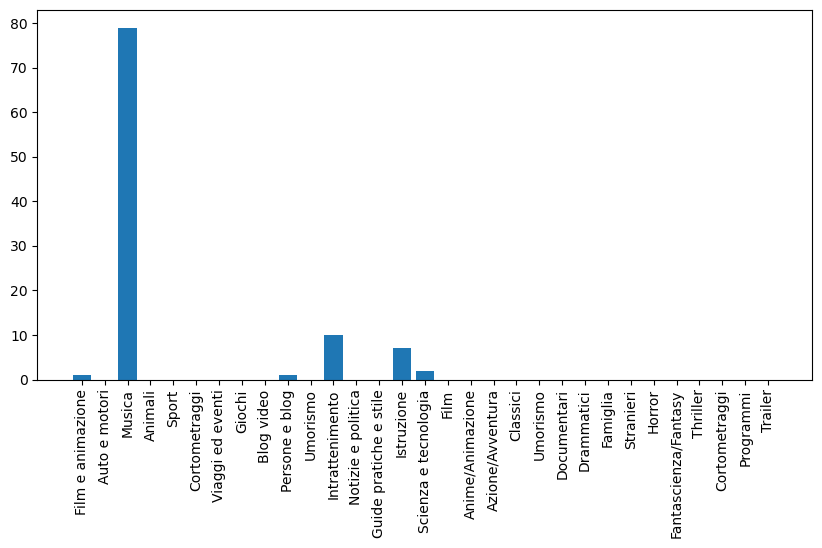

In [39]:
plot_categories_count(category_count_2012, categories)

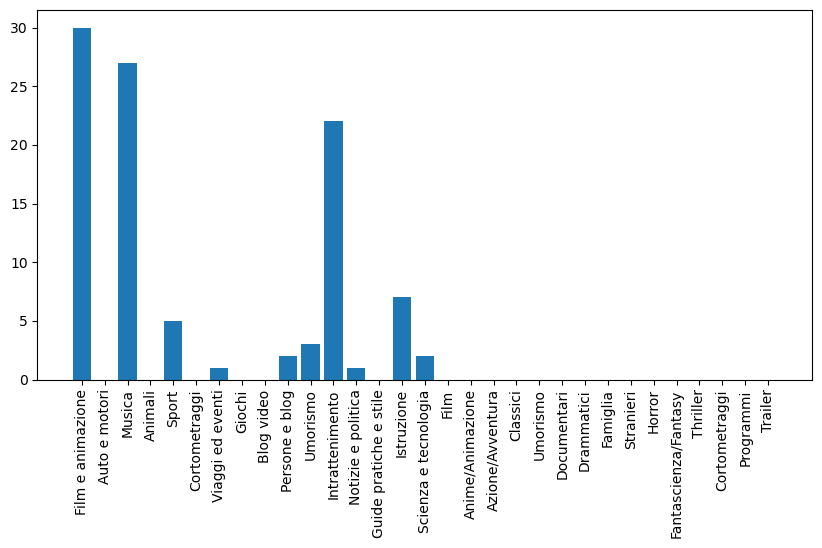

In [40]:
plot_categories_count(category_count_2014, categories)

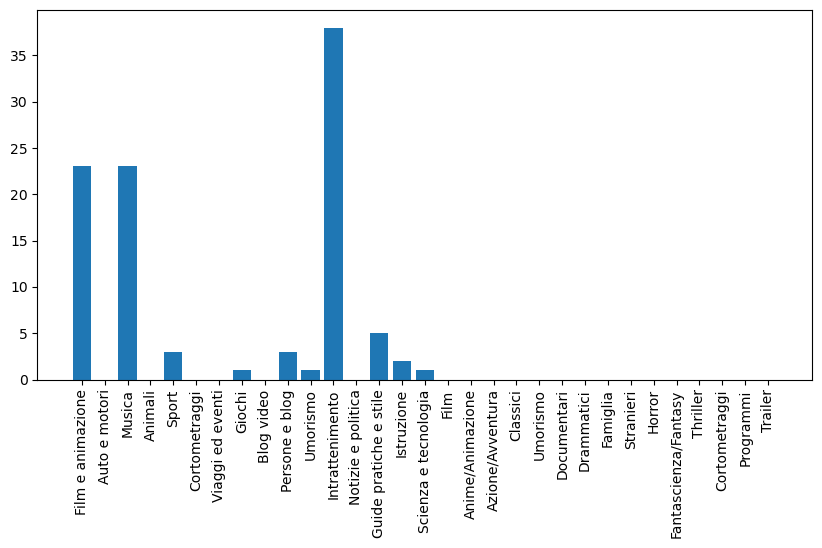

In [41]:
plot_categories_count(category_count_2016, categories)

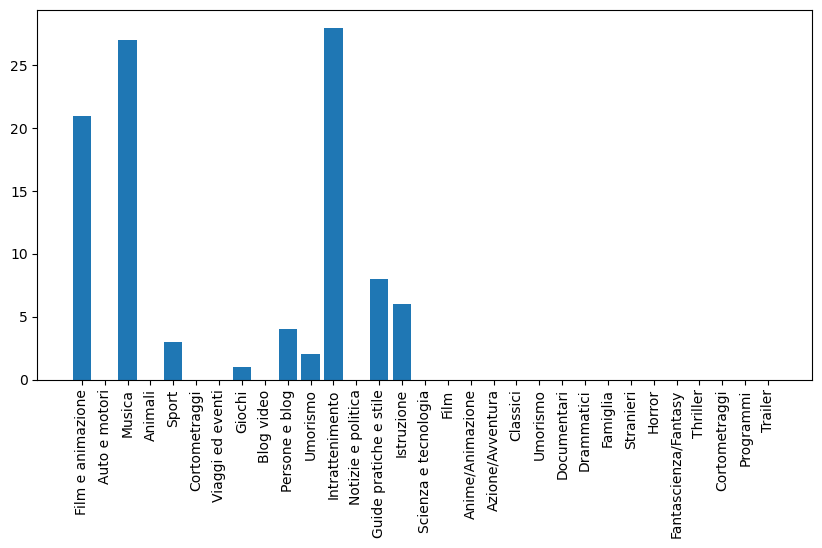

In [42]:
plot_categories_count(category_count_2018, categories)

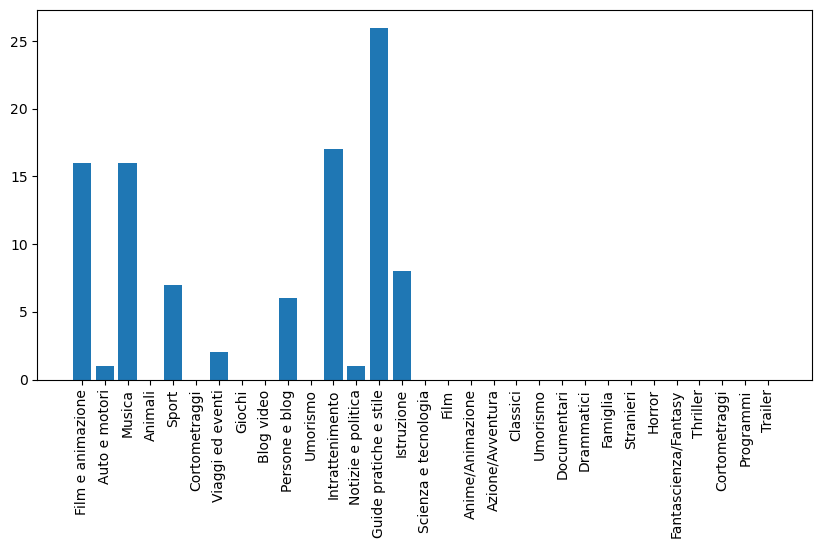

In [43]:
plot_categories_count(category_count_2020, categories)

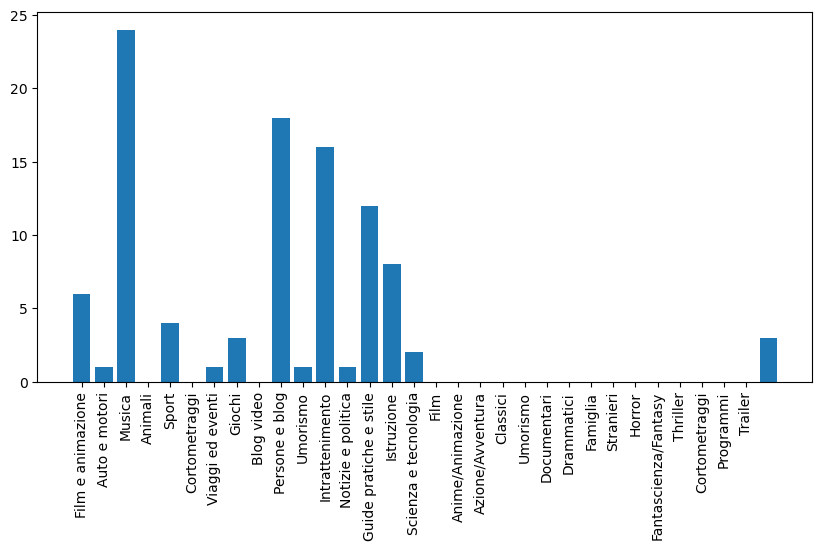

In [44]:
plot_categories_count(category_count_2022, categories)

Consideriamo le 5 categorie più presenti: Musica, Intrattenimento, Guide pratiche e stile, Persone e blog, Film e animazione. La scelta ricade su queste categorie perchè la somma dei video di queste categorie raggiunge un valore del 70%-80% rispetto al totale dei video, in ogni anno esaminato. Detto ciò possiamo passare al punto successivo, ovvero prendere le visualizzazioni di ogni anno per le categorie più presenti.

In [45]:
def key_from_value(name_category):
    for key in categories.keys():
        if categories[key] == name_category:
            return key

Questo metodo serve solamente per ricavare da un dizionario una chiave partendo da un valore.

In [46]:
def category_views(name_category):
    years = ["2008", "2010", "2012","2014","2016","2018","2020","2022"]
    
    year_sum = {}
    
    for year in years:
        
        dataframe_name = f"df_{year}"
        views_sum = 0
        dataframe = globals()[dataframe_name]
        dataframe['IDCategoria'] = dataframe['IDCategoria'].astype(str)

        # Filtra il DataFrame per la categoria specifica
        category_df = dataframe[dataframe['IDCategoria'] == key_from_value(name_category)]
        
        # Calcola la somma delle visualizzazioni
        views_sum = category_df['Visualizzazioni'].sum()
        
        # Aggiungi la somma al dizionario
        year_sum[year] = (int(views_sum) * 100)/dataframe["Visualizzazioni"].sum()
    
    # Creazione del grafico
    plt.figure().set_figwidth(10) 
    plt.plot(years, year_sum.values(),marker='o')
    plt.title(f"Somma delle visualizzazioni per la categoria {name_category} negli anni")
    plt.xlabel("Anno")
    plt.ylabel("Somma delle visualizzazioni")
    
    for i in years:
        plt.text(i, year_sum[i], f'{year_sum[i]:.2f}', va='baseline')
        
    plt.show()    

Questo metodo prende in input una categoria e, per ogni anno preso in esame, calcola la percentuale di visualizzazioni rispetto la somma totale. Usiamo la percentuale perchè ci sono anni che hanno un numero minore di visualizzazioni nonostante la percentuale sui 100 video sia molto più alta.

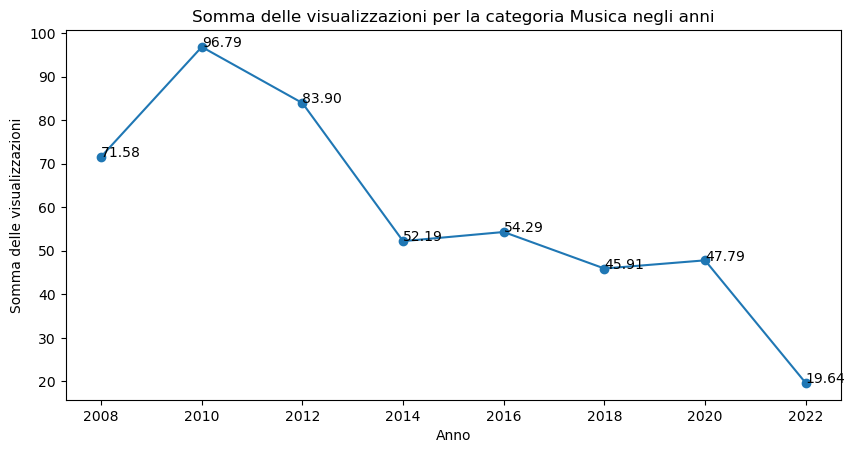

In [47]:
category_views("Musica")

La categoria Musica è sicuramente una delle più importanti, sia negli anni pasati sia al giorno d'oggi. Gli anni che vanno dal 2008 al 2012 rappresentano il momento più alto di questa categoria, in particolare il 2010, anno in cui la categoria Musica ha avuto il 96% delle visualizzazioni totali della Top100. Tuttavia nel corso degli anni questa percentuale è calata, mantenendosi intorno al 50% tra il 2014 e il 2020, fino a raggiungere nel 2022 il 20%. Questo potrebbe essere causato dalla nascita di piattaforme per lo streaming di musica, come Spotify(2013) e Apple Music(2015), l'unica presente prima del 2008 era SoundCloud(2007). Questa analisi ci dimostra come questa categoria resti comunque una delle più significative per Youtube, nonostante il calo di visualizzazioni.

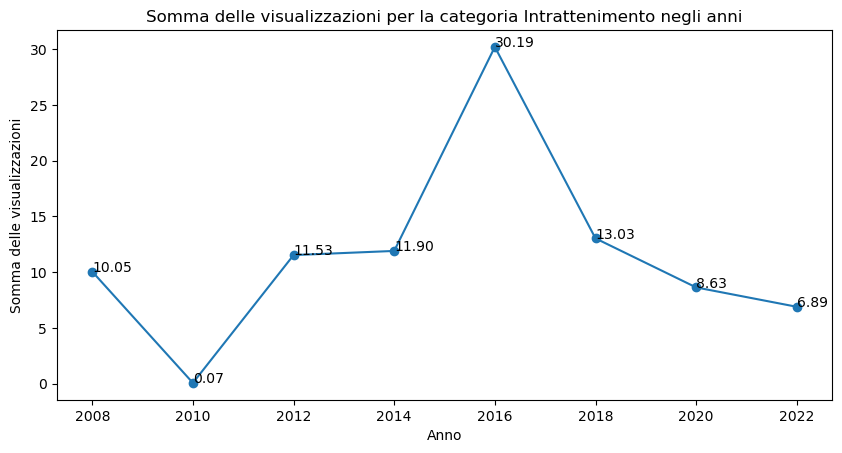

In [48]:
category_views("Intrattenimento")

La nascita di youtube ha portato gran parte del pubblico ad allontanarsi dai vecchi media come la TV a favore di una piattaforma in cui la possibilità di vedere il contenuto desiderato non era limitata ad una determinata ora del giorno.Ciò ha portato coloro che avevano un ampio riscontro grazie alla televisione a creare contenuti anche per il pubblico che non seguiva il programma in diretta. Questo ha riempito youtube con video dei momenti salienti dei programmi più seguiti in TV, tra i tanti possiamo notare format come Masterchef e Italia's got Talent. Il cambiamento avvenuto ha comportato un aumento della categoria "Intrattenimento" che ha raggiunto il suo apice nel 2016, raggiungendo il 30% delle visualizzazioni totali. Tuttavia negli ultimi anni questa categoria è scesa molto, arrivando al 6% delle visualizzazioni nel 2022.

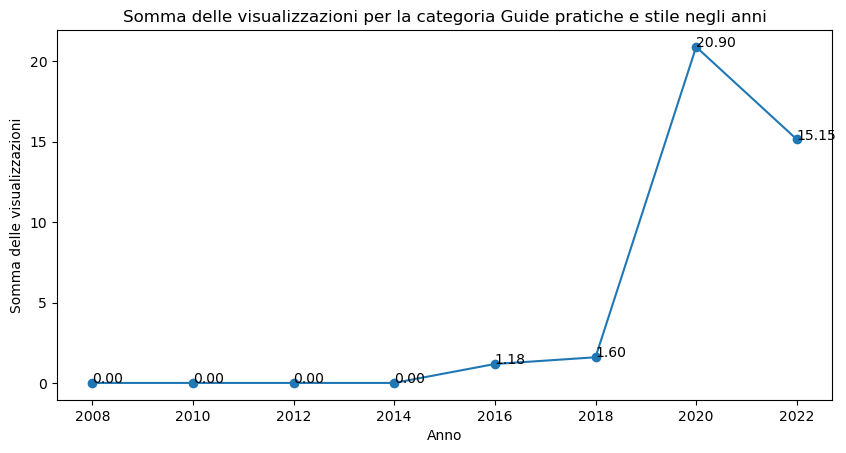

In [49]:
category_views("Guide pratiche e stile")

L'aumento di visualizzazioni registrato nella categoria "Guide pratiche e Stile" potrebbe essere la conseguenza dei contenuti tutorial, questi hanno trasformato la piattaforma riempiendola di contenuti basati sullo spiegare ed insegnare come fare qualsiasi cosa. L'aumento di questa categoria si registra soprattutto nel 2020, un periodo in cui a causa del covid i tutorial hanno rappresentato una soluzione per gli utenti che cercavano qualche ricetta da fare in casa o un modo per allenarsi in assenza di una palestra. Questa supposizione è confermata sia dal numero di video nella top 100 ma anche dalle visualizzazioni, rimaste più o meno costanti fino al 2018, raggiungendo il 18% nel 2020 e,in seguito alla fine della pandemia, calando di 5 punti percentuale nel 2022.

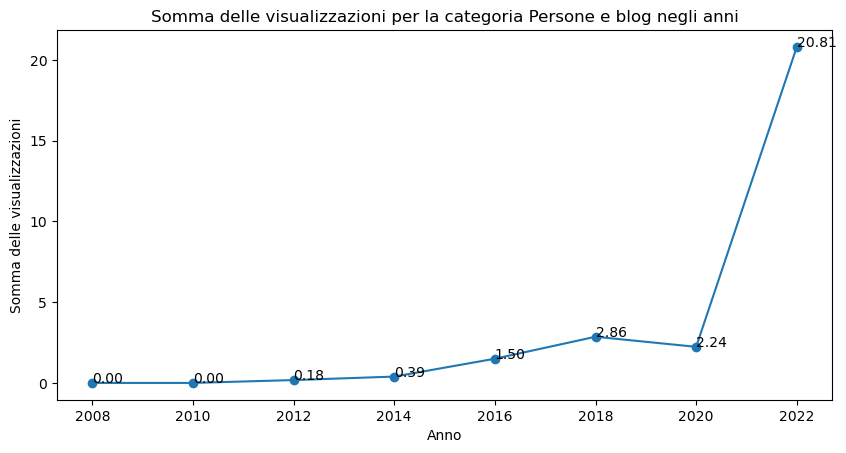

In [50]:
category_views("Persone e blog")

Per quanto riguarda "Persone e blog" questa categoria potrebbe essere influenzata dalla nascita della figura dei content creator, che hanno trasformato la piattaforma a in un contenitore di video creati da utenti per altri utenti e non più canali importanti(es. Vevo) o professionisti. Questa categoria ha aumentato le sue visualizzazione negli anni, fino a raggiungere il suo picco nel 2022, con una percentuale del 20%.

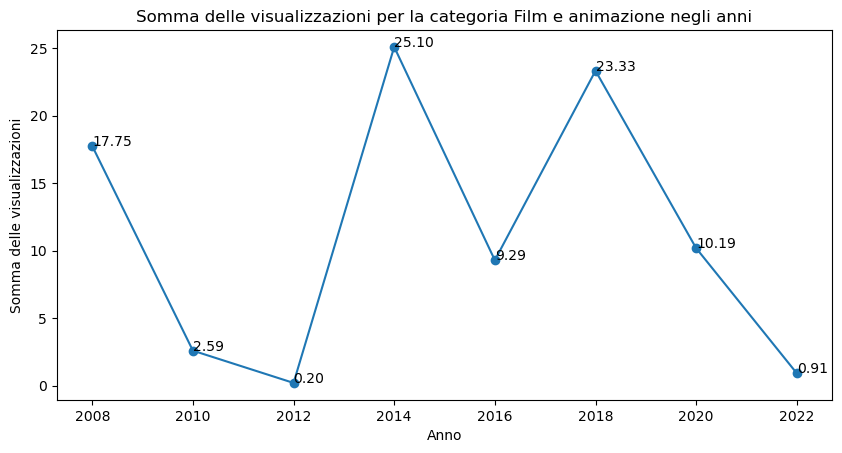

In [51]:
category_views("Film e animazione")

Infine troviamo la categoria "Film e animazione", a differenza delle altre, questa ha registrato più cambiamenti. Nel 2008 la categoria registra il 17%, tuttavia questo valore cala nel corso degli anni fino al 2012, anno in cui un solo video della categoria rientra nella classifica. Nel 2014 raggiunge il suo picco di visualizzazioni(25%) ma anche questa volta il le visualizzazioni sono diminuite nel 2016 per poi risalire nel 2018 e calare nuovamente fino al 2022 in cui si raggiunge il secondo peggior punteggio(meno dell'1%).

Queste rappresentazioni ci mostrano come non sempre la presenza di un alto numero di video nella Top100 implica obbligatoriamente un alto numero di visualizzazioni. Possiamo inoltre notare come la piattaforma abbia dato più spazio ad un numero sempre maggiore di categorie, infatti se nei primi anni esaminati erano presenti 2 o 3 categorie che si dividevano la quasi totalità dei video, negli anni successivi questo dislivello è diminuito, raggiungendo il risultato migliore nel 2020, anno in cui ben 7 categorie avevano almeno 5 video nella classifica.

# Andamento like negli anni

Dopo aver esaminato i video dal punto di vista delle visualizzazioni, vediamo come il loro apprezzamento è cambiato negli anni.

In [52]:
def category_like(name_category):
    years = ["2008", "2010", "2012","2014","2016","2018","2020","2022"]
    
    year_sum = {}
    
    for year in years:
        
        dataframe_name = f"df_{year}"
        like_sum = 0
        dataframe = globals()[dataframe_name]
        dataframe['IDCategoria'] = dataframe['IDCategoria'].astype(str)

        # Filtra il DataFrame per la categoria specifica
        category_df = dataframe[dataframe['IDCategoria'] == key_from_value(name_category)]
        
        # Calcola la somma dei like
        like_sum = category_df['Like'].sum()
        
        # Aggiungi la somma al dizionario
        year_sum[year] = (int(like_sum) * 100)/dataframe["Like"].sum()
    
    # Creazione del grafico
    plt.figure().set_figwidth(10) 
    plt.plot(years, year_sum.values(),marker='o')
    plt.title(f"Somma dei like per la categoria {name_category} negli anni")
    plt.xlabel("Anno")
    plt.ylabel("Somma dei like")
    
    for i in years:
        plt.text(i, year_sum[i], f'{year_sum[i]:.2f}', va='baseline')
    
    plt.show()  

Questo metodo ci permette di prendere i dataframe relativi ogni anno e tramite un parametro in input che specifica la categoria ci permette di plottare come variano i like nel corso degli anni.

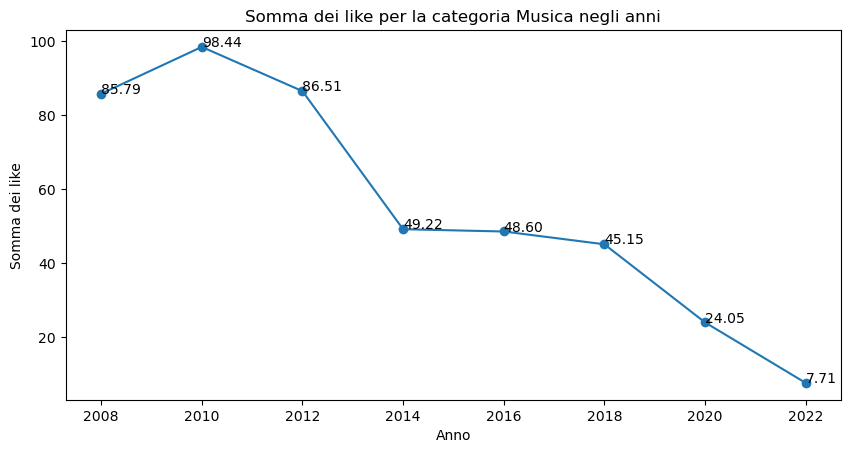

In [53]:
category_like("Musica")

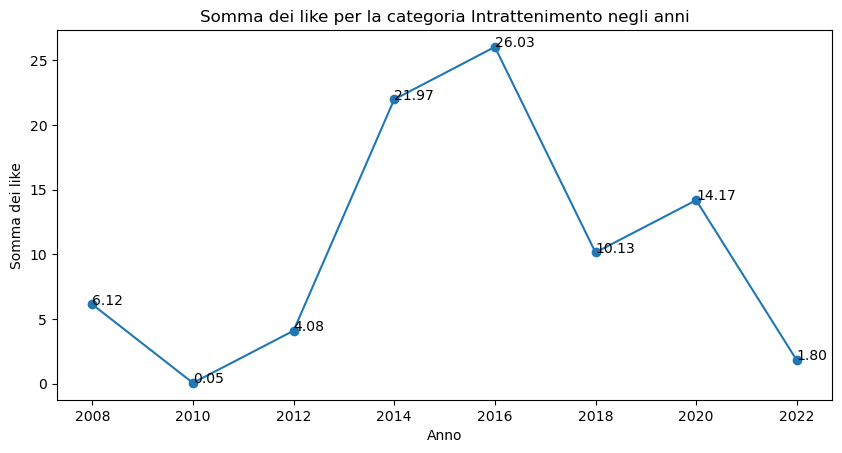

In [54]:
category_like("Intrattenimento")

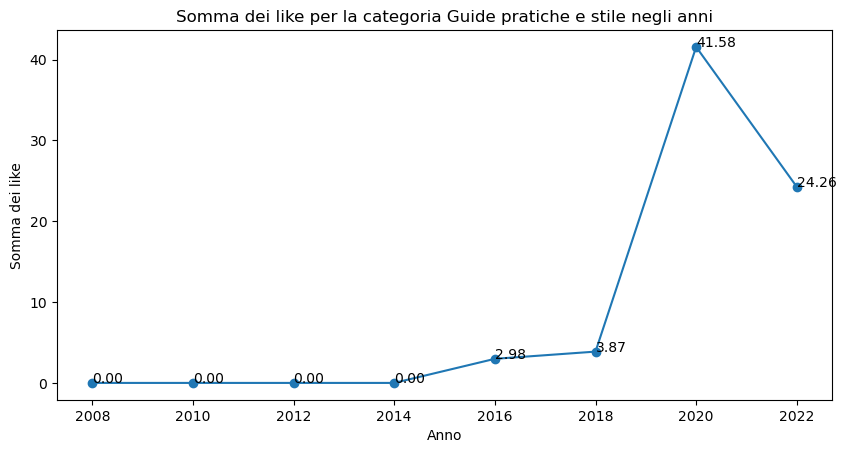

In [55]:
category_like("Guide pratiche e stile")

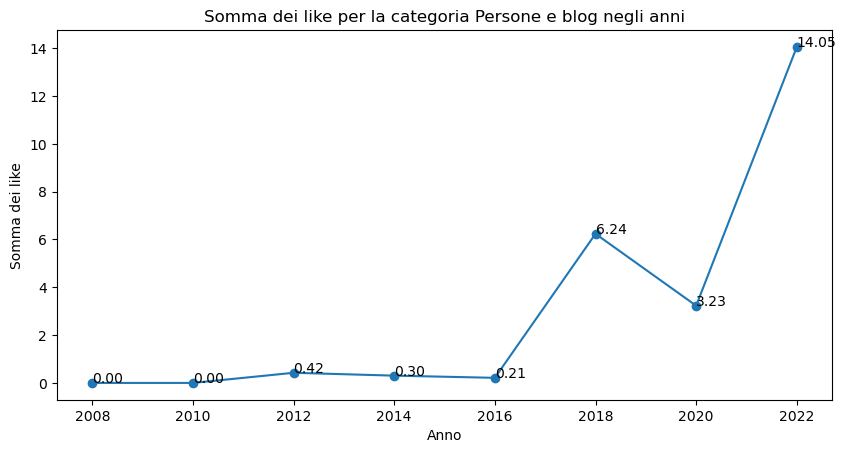

In [56]:
category_like("Persone e blog")

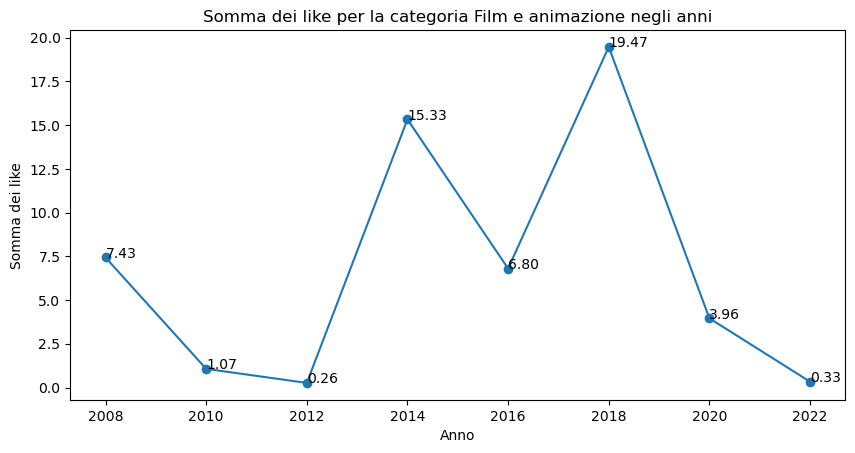

In [57]:
category_like("Film e animazione")

Analizzando i like è evidente come questi sono, più o meno, in linea con le visualizzazioni, tuttavia sono presenti comunque dei casi in cui like e visualizzazioni non corrispondono. Una netta differenza è nel 2014 nella categoria "Intrattenimento", infatti se per le visualizzazioni il 2014 era stato un anno con un risultato medio, se messo a paragone con gli altri anni della stessa categoria, nei like il 2014 rappresenta il punteggio più alto mai toccato, raggiungendo un valore poco sopra il 21%. E' presente un altro caso in cui assistiamo a una variazione tra like e visualizzazioni, ovvero nella categoria "Film e animazione". L'anno in cui notiamo questa variazione è il 2008, in cui la categoria ha il 17% delle visualizzazioni ma solo il 7% dei like. 

# Durata Video

Nel settembre 2020, YouTube ha annunciato che avrebbe lanciato una funzionalità beta chiamata YouTube Shorts. Gli strumenti di YouTube per la creazione di Short ti consentono di registrare uno o più clip che durano al massimo 60 secondi. La prima piattaforma a basare il suo intrattenimento su questo tipo di contenuti è stata TikTok, nata nel 2016 con il nome di musical.ly. Vediamo come questa novità ha influito sui video più visti confrontando il 2015 con il 2022.

In questa analisi, ci proponiamo di esplorare come gli Shorts di YouTube abbiano influito sulla durata media dei video pubblicati sulla piattaforma, confrontando questa dinamica con gli anni precedenti. La domanda che ci poniamo è la seguente: la tendenza verso video più brevi sta modificando il modo in cui gli utenti interagiscono con il contenuto su YouTube, o la tradizione dei video più lunghi è ancora la scelta principale degli utenti?

In [61]:
def df_scatter(df):
    colors = ['red' if i < 20 else 'blue' for i in range(len(df['Durata']))]
    
    plt.figure(figsize=(10, 20))
    plt.scatter(df['Durata'], df['Visualizzazioni'].astype(str), c=colors)
    plt.gca().invert_yaxis()
    plt.xlabel('Durata')
    plt.ylabel('Visualizzazioni')
    #plt.grid(True)
    plt.show()

Se provassimo a plottare un anno qualsiasi non riusciremmo a capire bene il grafico, questo a causa degli outlier. Allora si deve scegliere un metodo per rimuoverli, in questo caso ho scelto di usare l'interquartile range.

In [62]:
def search_outlier(df):
    # Calcola i quartili
    q1 = df['Durata'].quantile(0.25)
    q3 = df['Durata'].quantile(0.75)

    # Calcola l'intervallo interquartile
    iqr = q3 - q1

    # Calcola i limiti per identificare gli outlier
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identifica gli outlier
    outliers = df[(df['Durata'] < lower_bound) | (df['Durata'] > upper_bound)]

    # Rimuovi gli outlier dal dataframe originale
    df_cleaned = df[~((df['Durata'] < lower_bound) | (df['Durata'] > upper_bound))]

    return df_cleaned

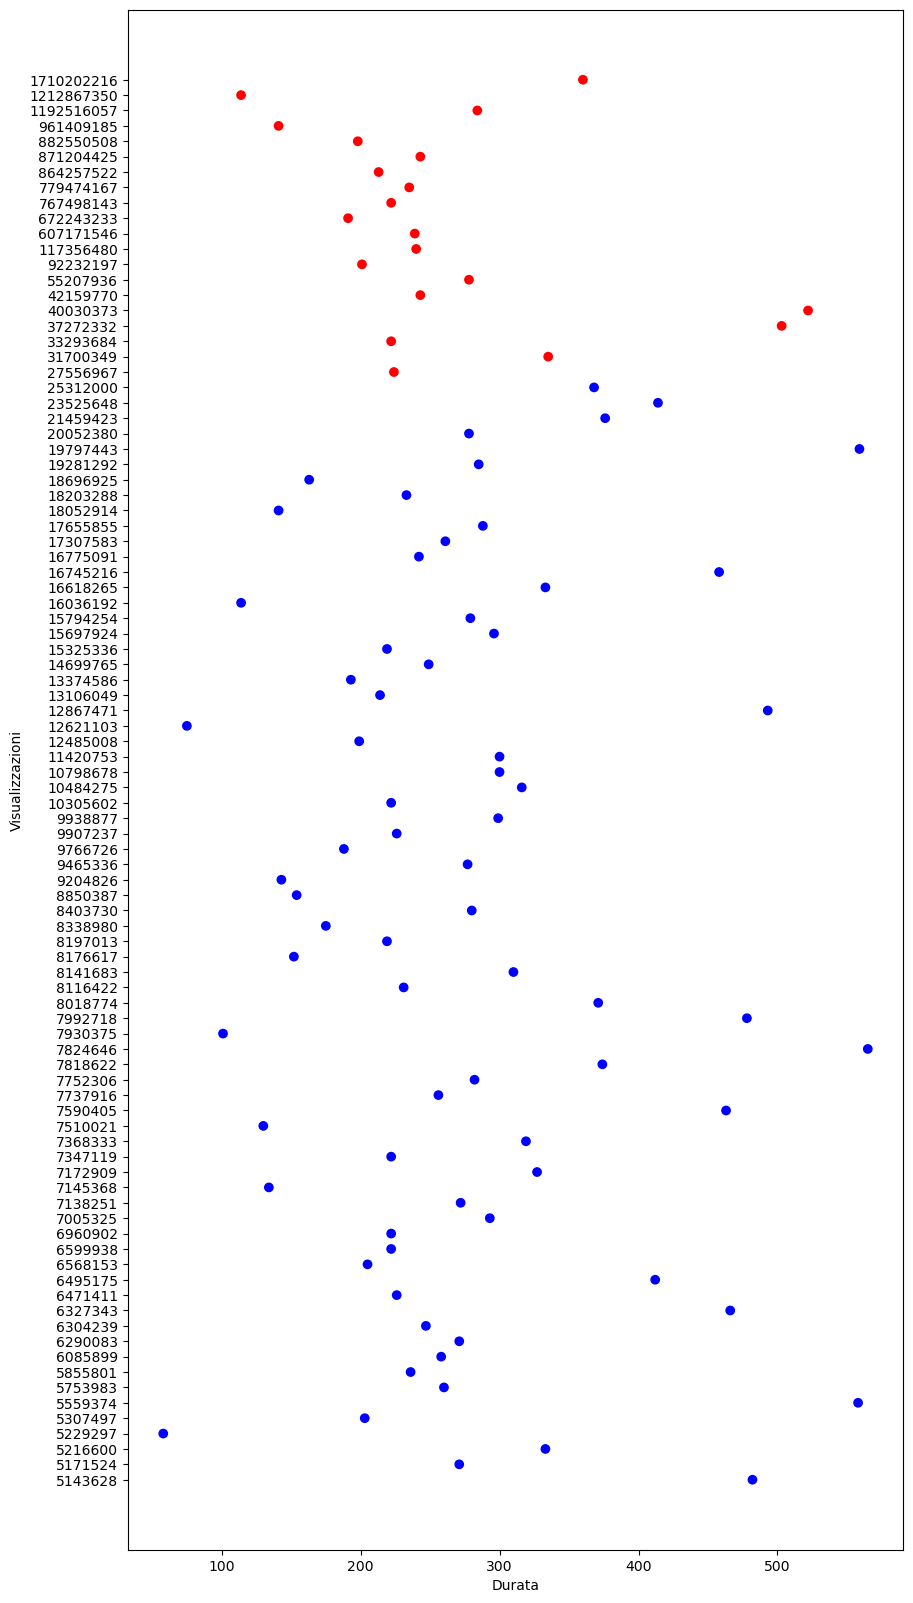

In [63]:
df_scatter(search_outlier(df_2008))

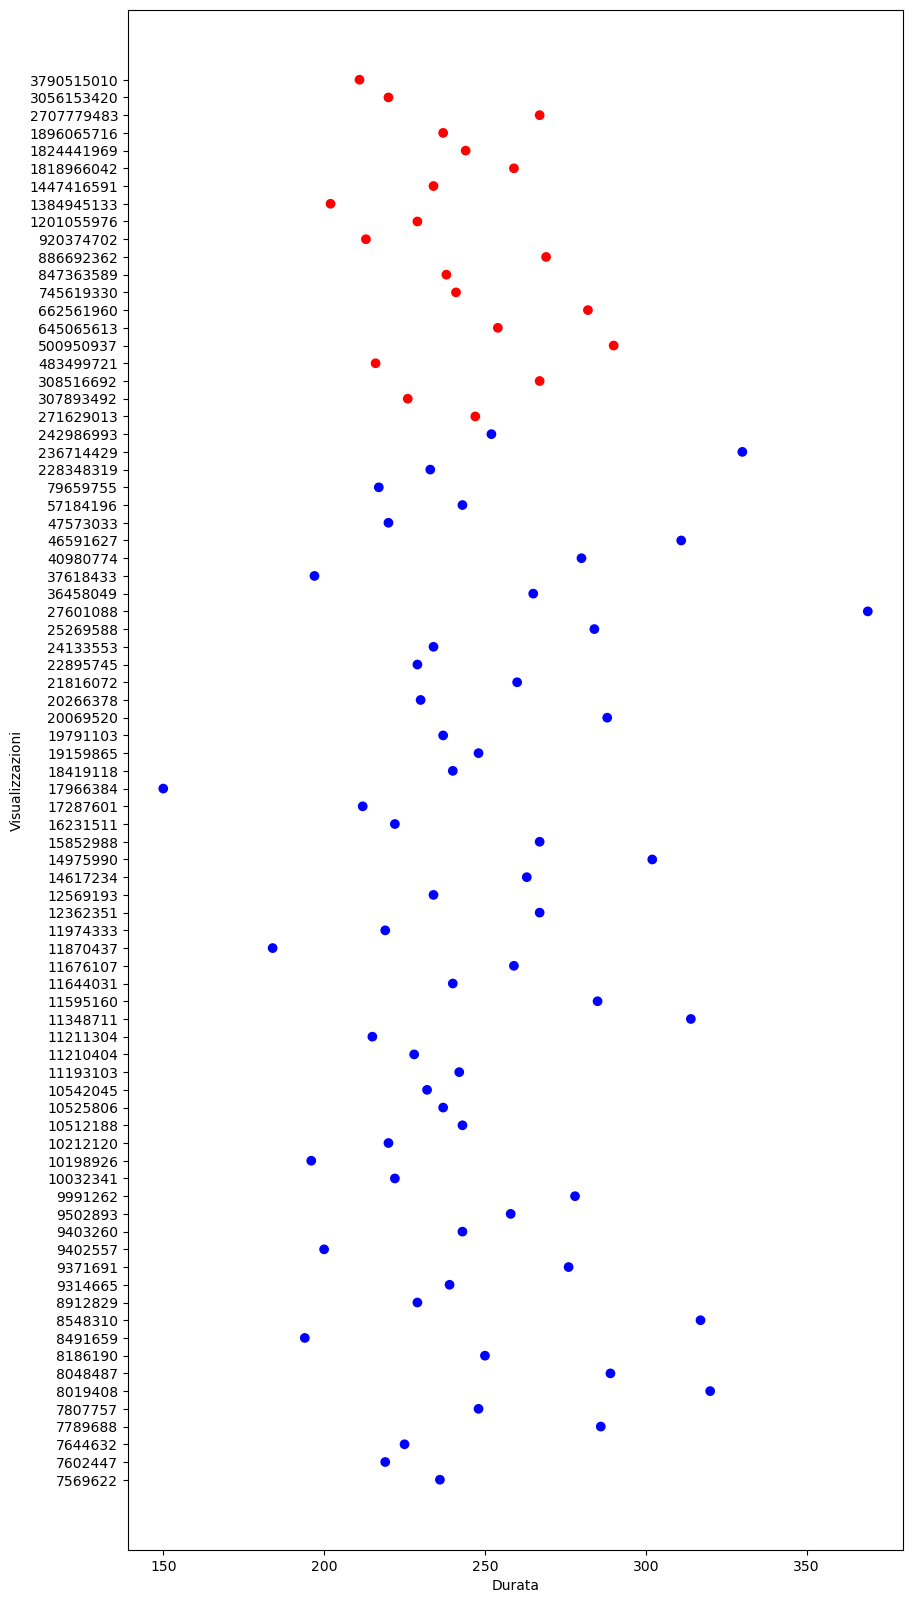

In [64]:
df_scatter(search_outlier(df_2010))

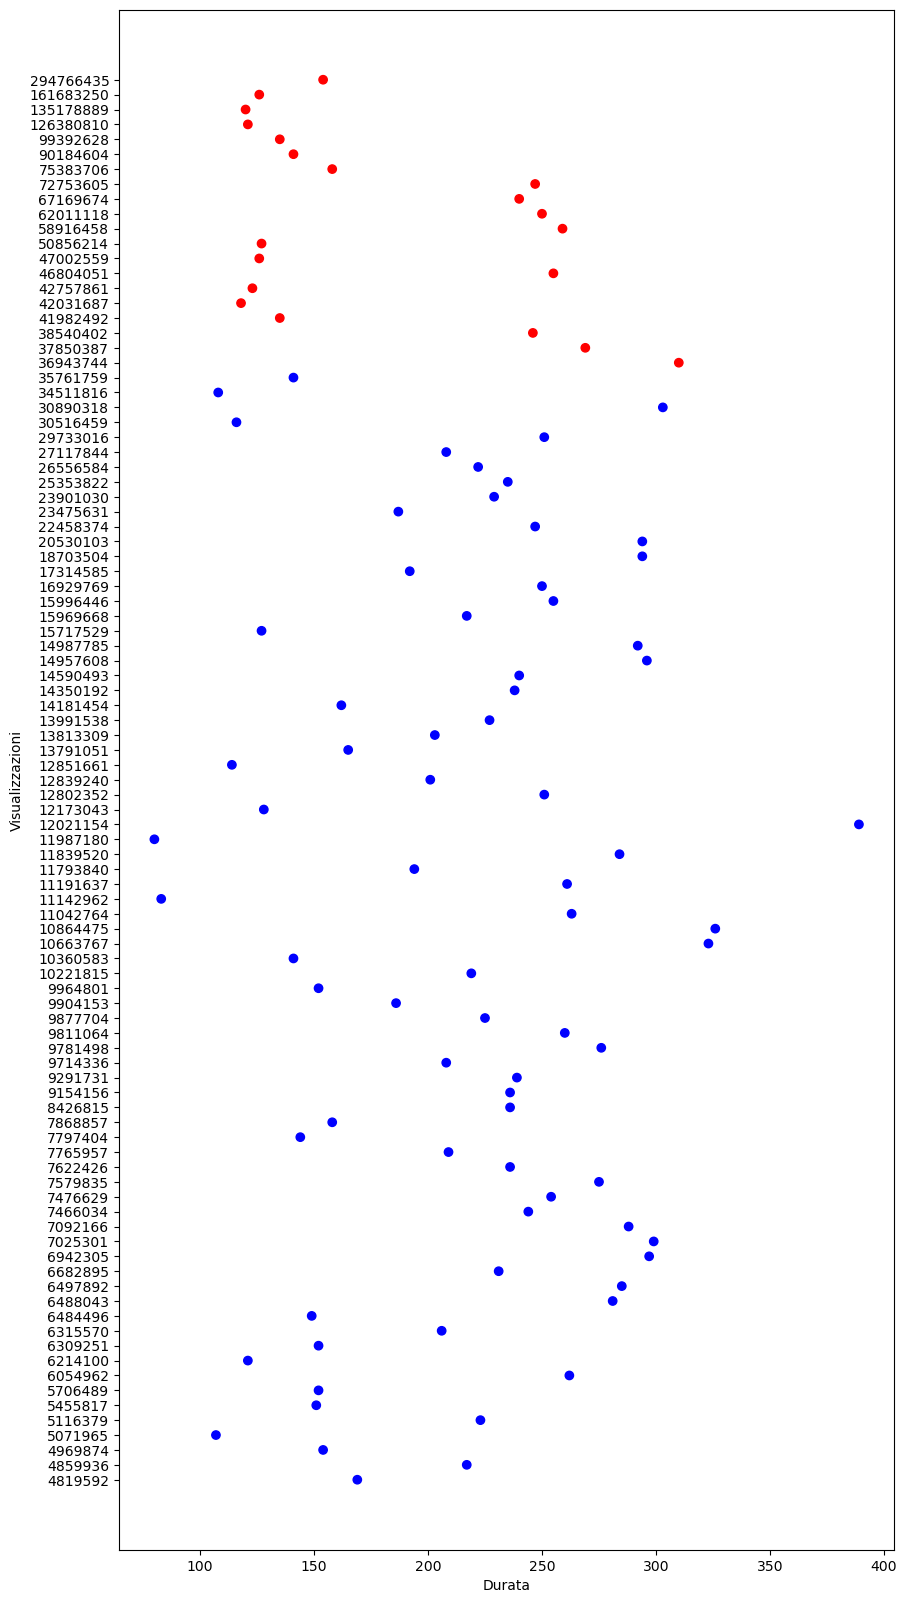

In [65]:
df_scatter(search_outlier(df_2012))

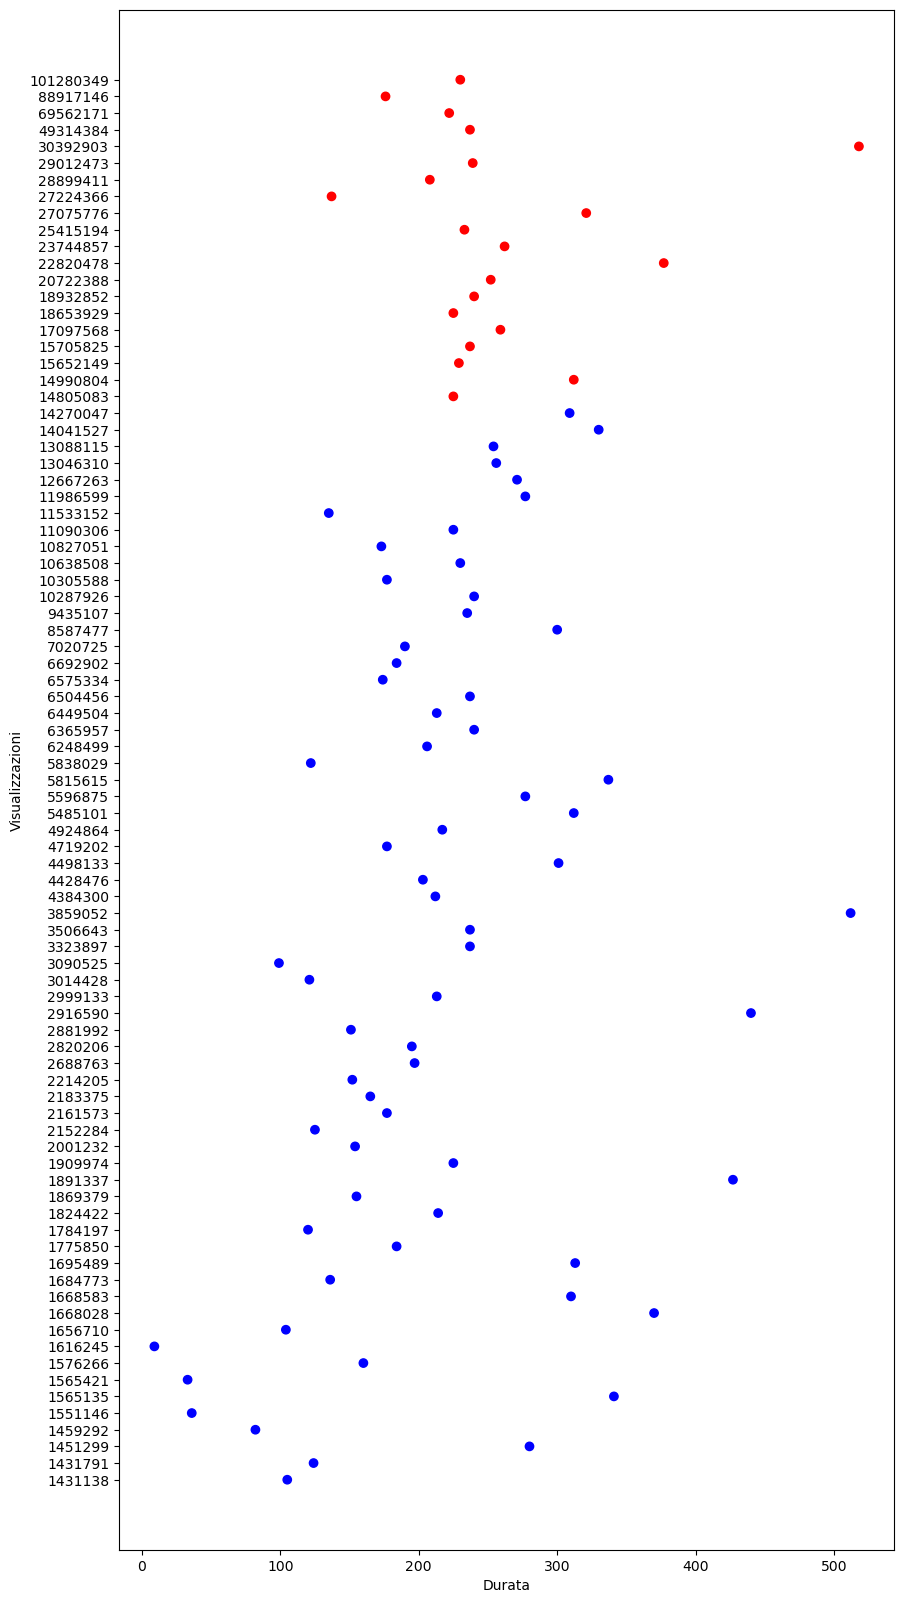

In [66]:
df_scatter(search_outlier(df_2014))

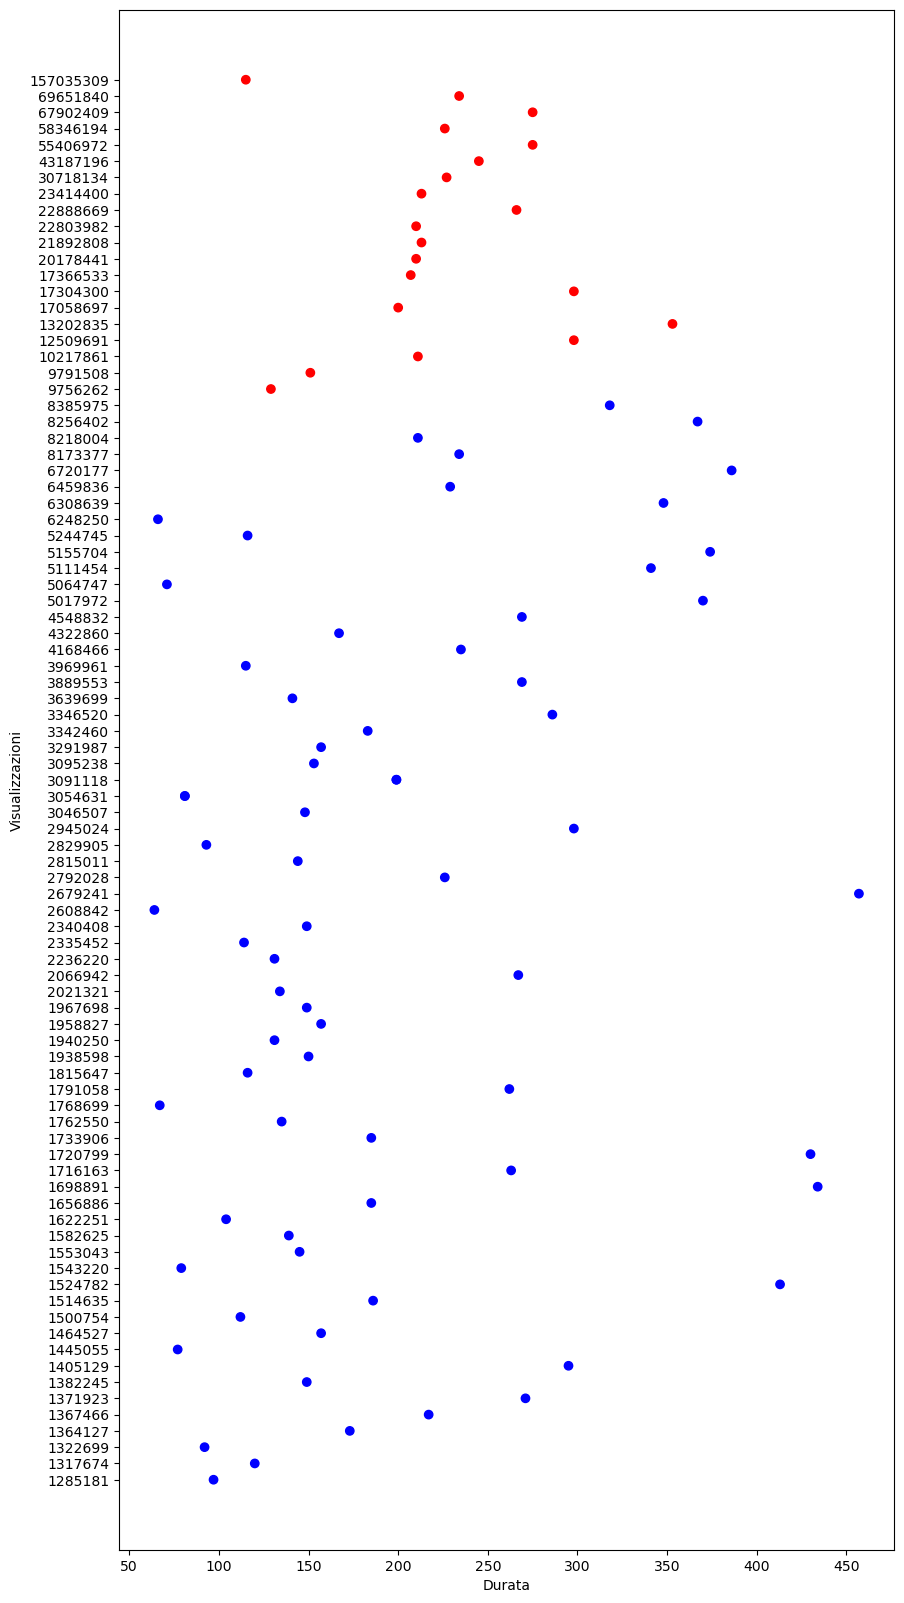

In [67]:
df_scatter(search_outlier(df_2016))

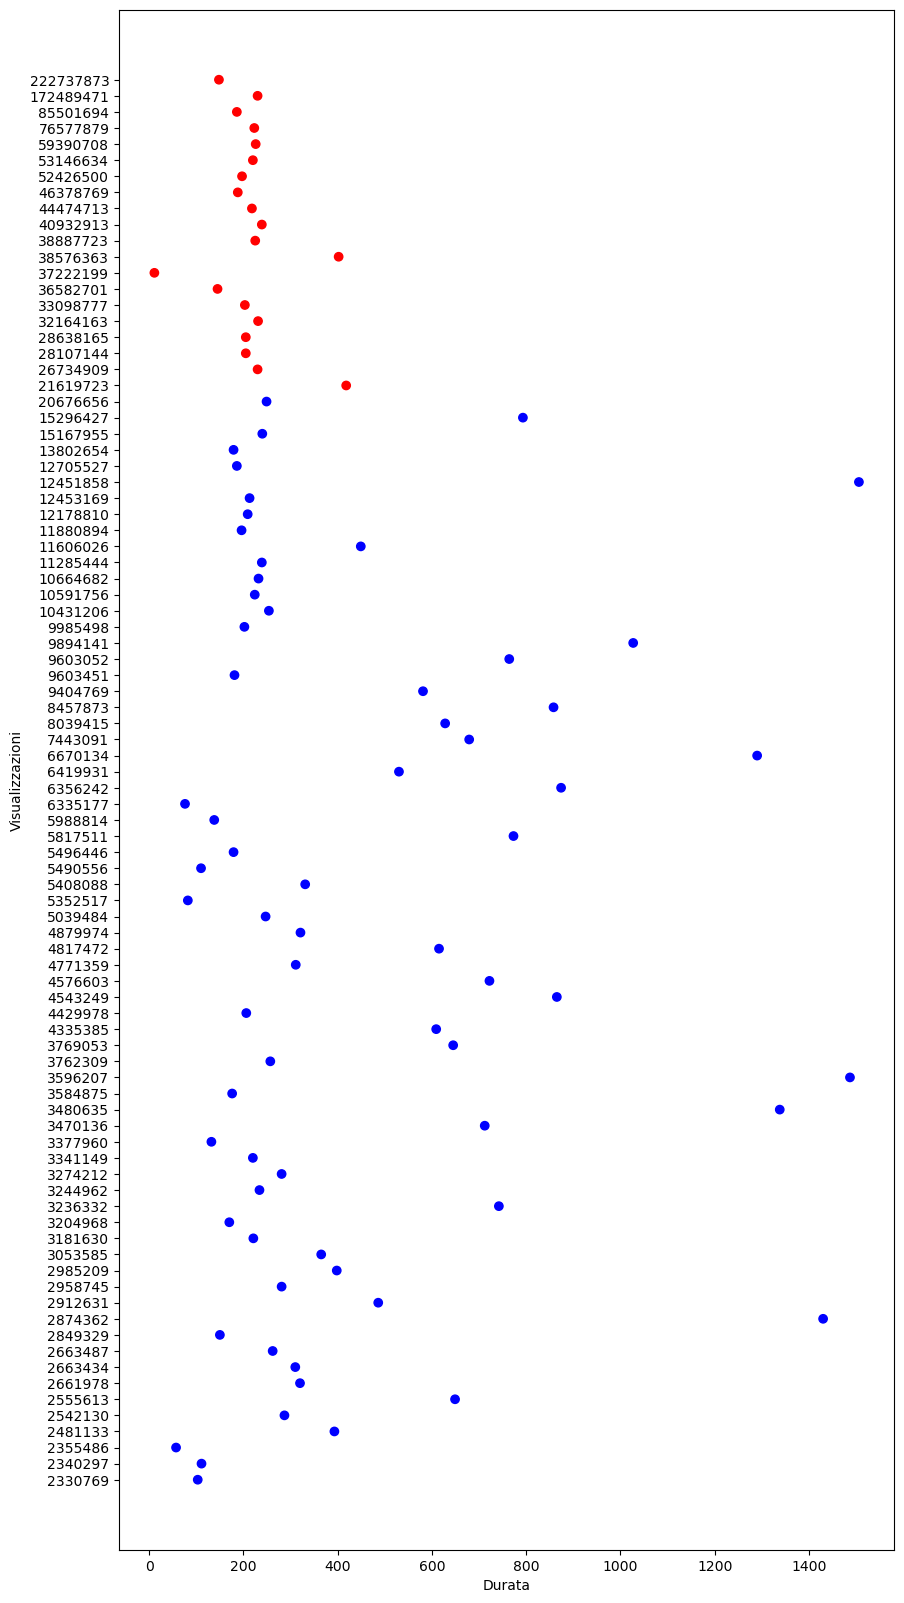

In [68]:
df_scatter(search_outlier(df_2018))

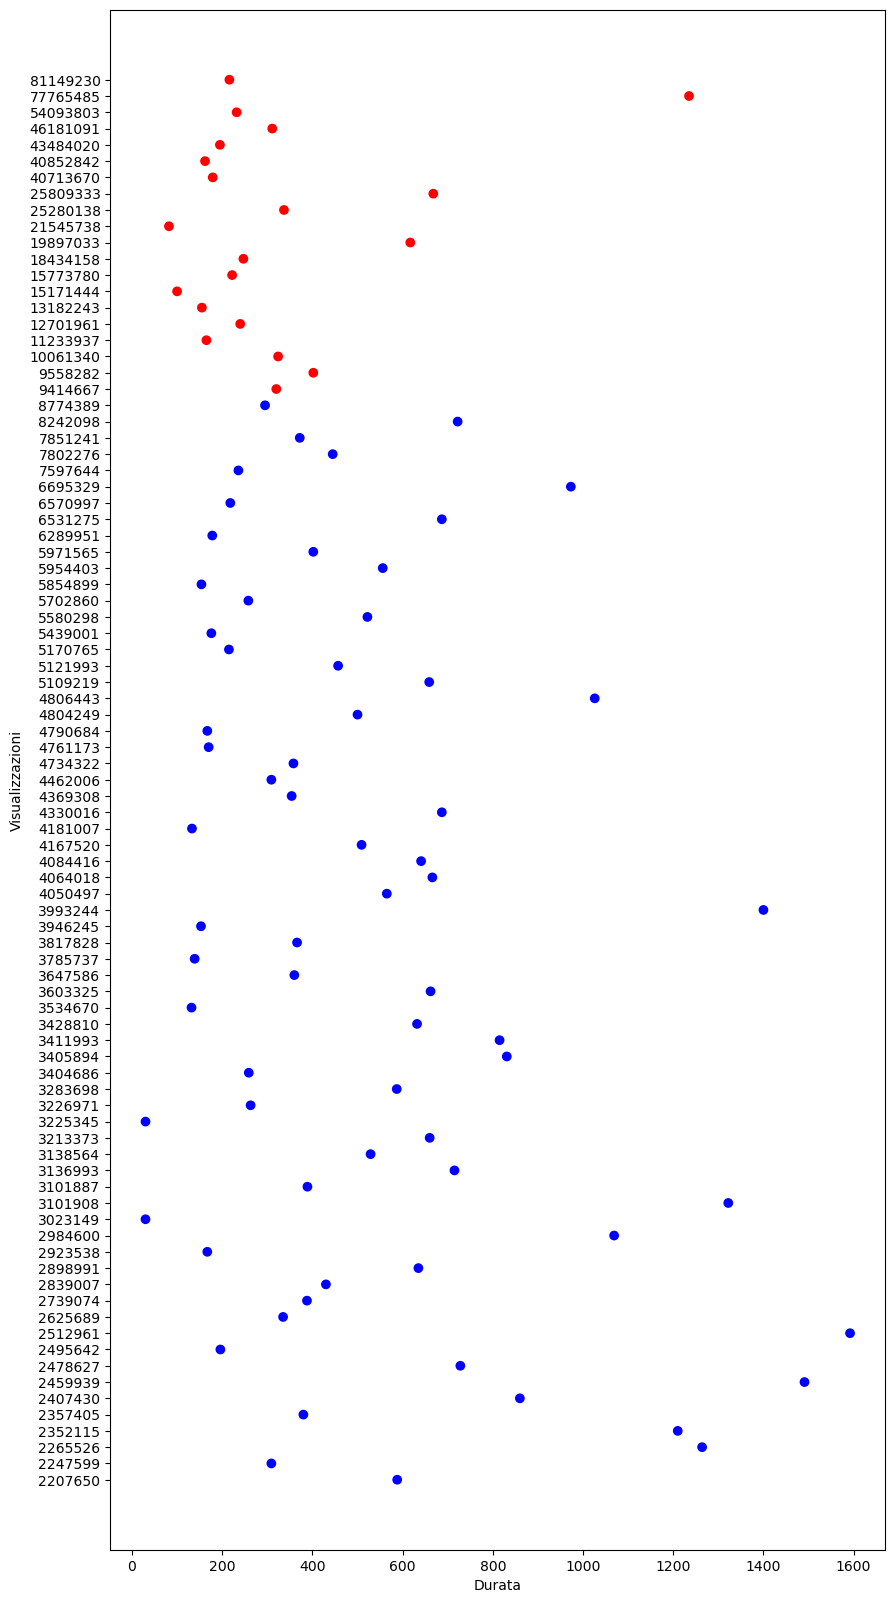

In [69]:
df_scatter(search_outlier(df_2020))

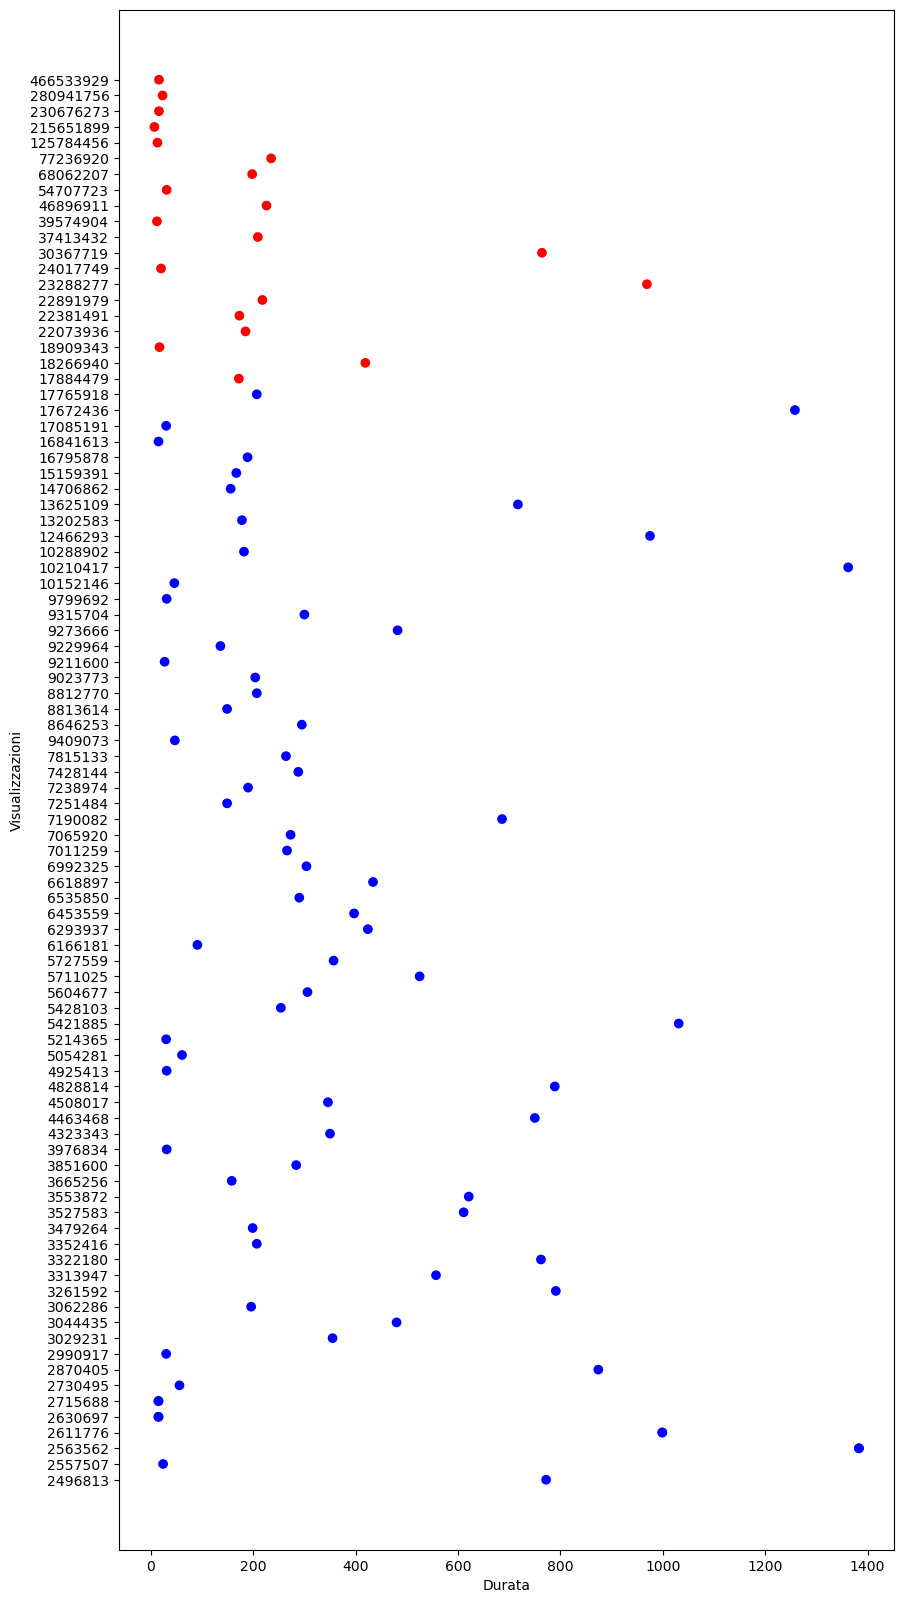

In [70]:
df_scatter(search_outlier(df_2022))

In [77]:
def duration_avg(num_videos):
    years = ["2008", "2010", "2012","2014","2016","2018","2020","2022"]
    
    duration_years = {}
    
    for year in years:
        
        # Prendi i primi 20 risultati del dataframe
        dataframe_name = f"df_{year}"
        dataframe = search_outlier(globals()[dataframe_name]).head(num_videos)
        
        # Aggiungi la media della durata al dizionario
        duration_years[year] = dataframe["Durata"].mean()
        
        
    # Creazione del grafico
    plt.figure().set_figwidth(10) 
    plt.plot(years, duration_years.values(),marker='o')
    plt.title("Durata media dei primi 10 video negli anni")
    plt.xlabel("Anno")
    plt.ylabel("Durata media")
    
    for i in years:
        plt.text(i, duration_years[i], f'{duration_years[i]:.2f}', va='baseline')
        
    plt.show() 

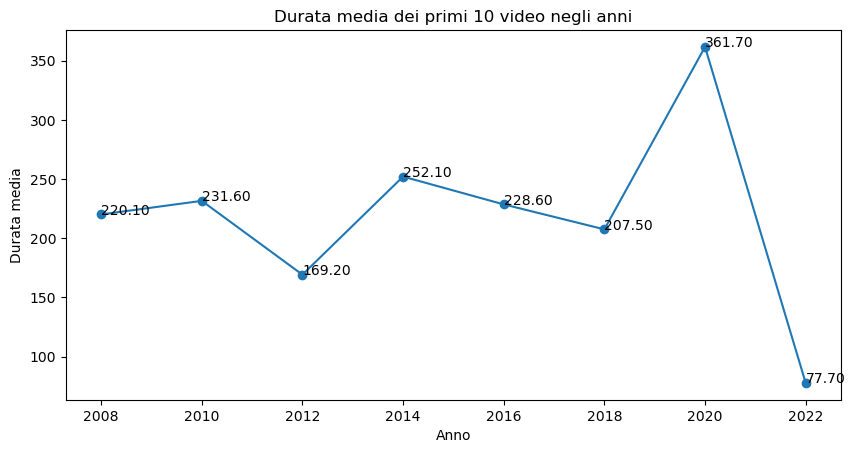

In [78]:
duration_avg(10)

Proviamo a vedere adesso se questo risultato si conferma anche su un numero maggiore di video.

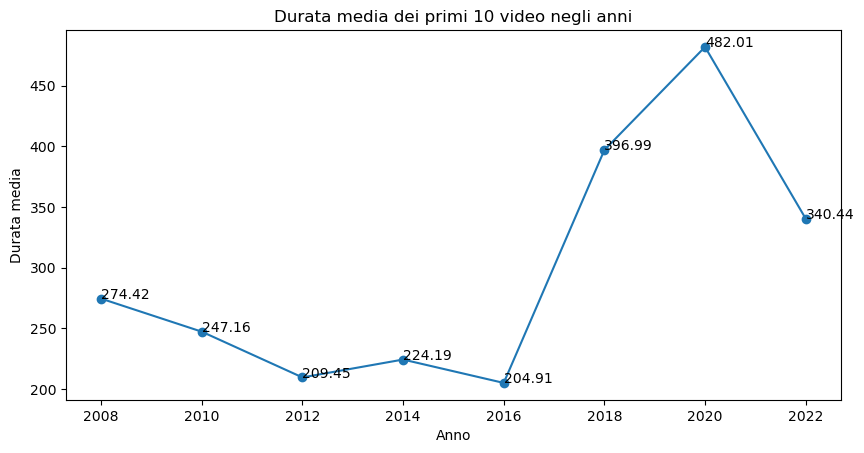

In [79]:
duration_avg(100)

L'analisi effettuata mostra come l'introduzione degli shorts su youtube ha portato dei cambiamenti. Infatti nonostante la durata media dei video non fosse costante prima di questa nuova funzionalità, è evidente come ci sia stato un netto calo nel 2022, in cui la durata media dei video più visti è di circa un minuto(77 secondi). Negli altri anni invece la durata media è quasi sempre costante, con dei valori compresi tra 220 e 250 secondi, quindi circa 4 minuti. Unico caso particolare è il 2020, anno di introduzione degli shorts, che regista un valore di 361 secondi(6 minuti). Tuttavia prendendo in considerazione un campione di video più grande possiamo notare come viene smentito ciò che avevamo visto per i primi 10 video. Infatti se il calo del 2022, rispetto al 2018 e 2020, è ancora evidente, ciò che si nota è come la durata media del 2022 sia molto più alta rispetto agli anni dal 2008 al 2016.

### Conclusione

L'analisi dettagliata della piattaforma YouTube rivela una realtà in costante trasformazione nel corso degli anni. Emergono chiaramente tendenze e mutamenti significativi, con gli ultimi anni che si distinguono come una fase di transizione fondamentale.

Dal 2008 al 2016, si osserva una notevole similitudine nei numeri, sia per quanto riguarda le categorie che dominano la Top 100, sia per la durata media dei video. Tuttavia, il 2020 segna un'inversione di tendenza, con un significativo aumento della durata media a 361 secondi e un aumento delle categorie rappresentate nella classifica. Il punto di svolta più evidente si verifica nel 2022, quando la durata media dei primi 10 video crolla a soli 70 secondi, rappresentando un cambiamento sostanziale rispetto agli anni precedenti. Questa drastica riduzione è attribuibile all'emergere degli Shorts, contenuti progettati per catturare l'attenzione istantanea degli spettatori.

L'influenza degli Shorts è innegabile, ma emerge un particolare interessante quando si esamina la durata media su un campione di 100 video: nonostante la prevalenza degli Shorts, la durata media nel 2022 supera quella degli anni precedenti (2008-2016). Questo dettaglio suggerisce che, nonostante questa funzionalità abbia segnato un nuovo standard per i contenuti brevi su YouTube, la piattaforma continua a offrire una gamma diversificata di contenuti di varia durata. La coesistenza di video più lunghi tra i primi 100 video del 2022 indica che, nonostante la crescente fruizione di contenuti brevi, c'è ancora spazio e apprezzamento per video di durata più estesa.

Anche per quanto riguarda le categorie, il 2022 si distingue come un anno estremamente significativo, con ben 14 categorie presenti nella Top 100, rappresentando il risultato più alto mai registrato. La presenza di video che spaziano dalla politica allo sport fino all'istruzione testimonia come YouTube abbia saputo attrarre un pubblico sempre più vasto e diversificato nel corso degli anni, introducendo nuove funzionalità e dando spazio a nuovi contenuti e creatori.  